BoxPlots for All patients

In [1]:

# Import Modules
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import ttest_ind, skew, ttest_rel
import Actigraph_Metrics

Define Functions

In [5]:
def MAD_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Accelerometry is at 100 Hz, so window_size = 100 means 1 second
    
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    #label axes
    ax[0,0].set_xlabel('SBS Score', fontsize = 8)
    ax[0,0].set_ylabel('MAD', fontsize = 8)
    ax[0,1].set_xlabel('SBS Score', fontsize = 8)
    ax[0,1].set_ylabel('Skew', fontsize = 8)
    ax[1,0].set_xlabel('SBS Score', fontsize = 8)
    ax[1,0].set_ylabel('Mean', fontsize = 8)
    ax[1,1].set_xlabel('SBS Score', fontsize = 8)
    ax[1,1].set_ylabel('Standard Deviation', fontsize = 8)
    
    # T-test Comparisons
    # -2 and 2
    # t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[2], sbs_mad_dict[-2], equal_var=False)

    # print("T-test for MAD values:")
    # print("T-statistic:", t_stat_mad)
    # print("P-value:", p_value_mad)

        # T-test Comparisons
    sbs_values = [-2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mad_dict[sbs_i] and sbs_mad_dict[sbs_j]:
                t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[sbs_i], sbs_mad_dict[sbs_j], equal_var=False)
                print(f"T-test for MAD values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mad}")
                print(f"P-value: {p_value_mad}")
                print()

    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def vitals_boxplot(sbs, vitals_signal, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = vitals_signal[i]
        if np.mean(signal) !=0:
            sbs_skew_dict[sbs_value].append(skew(signal))
            sbs_stdev_dict[sbs_value].append(np.std(signal))
            sbs_mean_dict[sbs_value].append(np.mean(signal))
        else:
            print(f'not enough data at sbs index {i}, flag_list detected') #flag list was detected here. Note: If you go into matlab to cross-check, be aware matlab indices start at 1
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
    
    #Drop NaN Values
    sbs_skew_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_skew_dict.items()}
    sbs_stdev_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_stdev_dict.items()}
    sbs_mean_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_mean_dict.items()}
    
    # Box plot: this version will show the outliers too
    ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0].set_xlabel('SBS Score', fontsize = 10)
    ax[0].set_ylabel('Stdev', fontsize = 10)
    ax[2].set_xlabel('SBS Score', fontsize = 10)
    ax[2].set_ylabel('Mean', fontsize = 10)
    ax[1].set_xlabel('SBS Score', fontsize = 10)
    ax[1].set_ylabel('Skew', fontsize = 10)

    # T-test
    sbs_values = [-3, -2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mean_dict[sbs_i] and sbs_mean_dict[sbs_j]:
                t_stat_mean, p_value_mean = ttest_ind(sbs_mean_dict[sbs_i], sbs_mean_dict[sbs_j], equal_var=False)
                t_stat_stdev, p_value_stdev = ttest_ind(sbs_stdev_dict[sbs_i], sbs_stdev_dict[sbs_j], equal_var=False)
                print(f"T-test for mean values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mean}")
                print(f"P-value: {p_value_mean}")
                print(f"T-test for standard deviation values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_stdev}")
                print(f"P-value: {p_value_stdev}")
                print()
    return ax, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

Load All Patient Data

In [8]:
# data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
data_dir = r'S:\Sedation_monitoring\PedAccel_directory\PedAccel\data_analysis\PythonPipeline\PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 15
slice_size_min = 16
sr = .5


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -11.514298130963637
P-value: 1.5149650335866497e-30

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -5.624648662066104
P-value: 1.885261594002786e-08

T-test for MAD values between SBS Score -1 and 2:
T-statistic: -3.933351541424826
P-value: 8.412335342310104e-05

T-test for MAD values between SBS Score 0 and 1:
T-statistic: 8.477857505709501
P-value: 2.5146669774985702e-17

T-test for MAD values between SBS Score 0 and 2:
T-statistic: 7.028537619298478
P-value: 2.153501326901956e-12

T-test for MAD values between SBS Score 1 and 2:
T-statistic: -0.16410649961776683
P-value: 0.8696493163149317



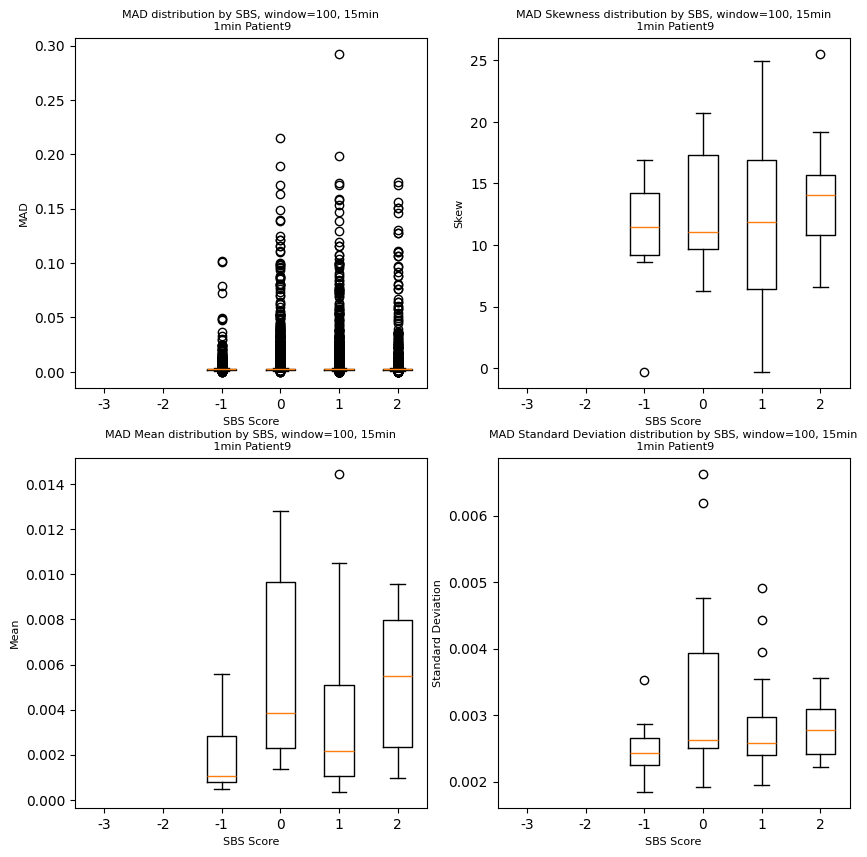

length of signal window for BoxPlot function: 480
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 46, flag_list detected
not enough data at sbs index 55, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.03981493053812864
P-value: 0.9688600757540253
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.8138669154127791
P-value: 0.42954830934603827

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.25184835811797535
P-value: 0.8050744380061259
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.7704038790861423
P-value: 0.45969774340338776

T-test for mean values between SBS Score -1 and 2:
T-statistic: -1.5757855896653266
P-value: 0.13583135744788857
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 0.2044831791232132
P-value: 0.8407339888988885

T-test for mean values 

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

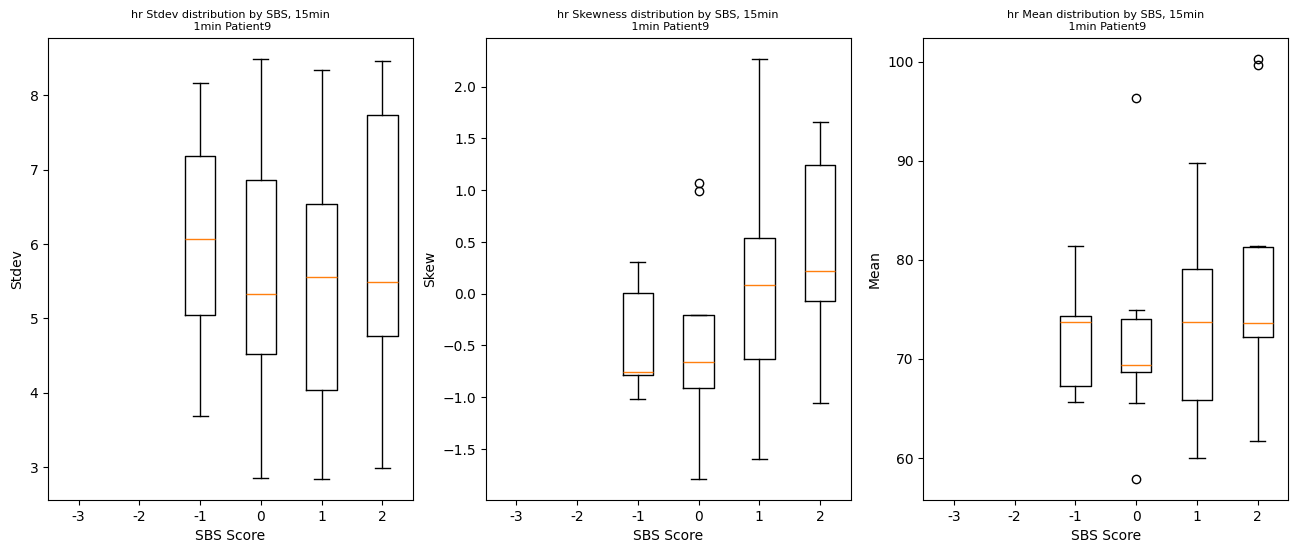

length of signal window for BoxPlot function: 480
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 33, flag_list detected
not enough data at sbs index 46, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.1610171250526968
P-value: 0.2714809673549533
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.1439489673044094
P-value: 0.2736778014354854

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.1935222530521845
P-value: 0.8516693716278343
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -1.5083802172251402
P-value: 0.16564713288959182

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.5955784545256267
P-value: 0.5642825825042642
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -0.9715852487309096
P-value: 0.34688379386623436

T-test for mean values between SBS Score 0 and 1:
T-statistic: 1.3736916061626738
P-value: 0.1900280246321058
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.17456125939059272
P-value: 0.8646584944630751

T-test for mean values between SBS Score 0 and

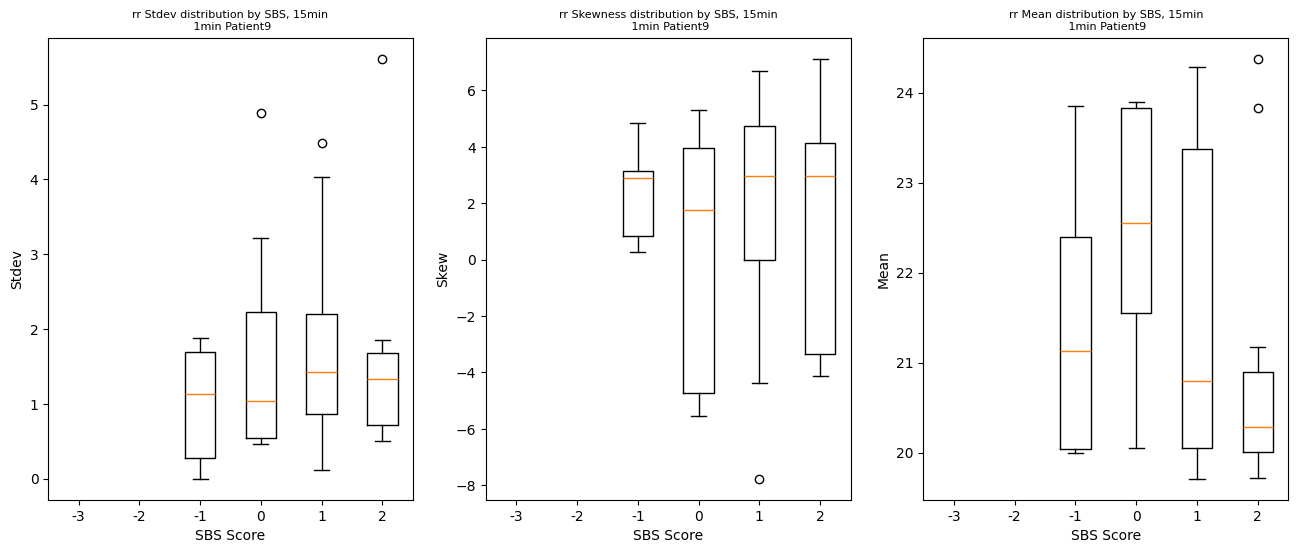

length of signal window for BoxPlot function: 480
not enough data at sbs index 10, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.09775638087023795
P-value: 0.9239841386225102
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.03438037203951398
P-value: 0.9730542893530272

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.09567516581926719
P-value: 0.9262663547404766
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 1.676118647751093
P-value: 0.11692365920507852

T-test for mean values between SBS Score -1 and 2:
T-statistic: -1.8780732893018823
P-value: 0.10349461692521693
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 5.075036931498051
P-value: 0.00014962963919980376

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.017194075533622434
P-value: 0.9864590947338177
T-test for standard deviation values between SBS Score 0 and 1:
T

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

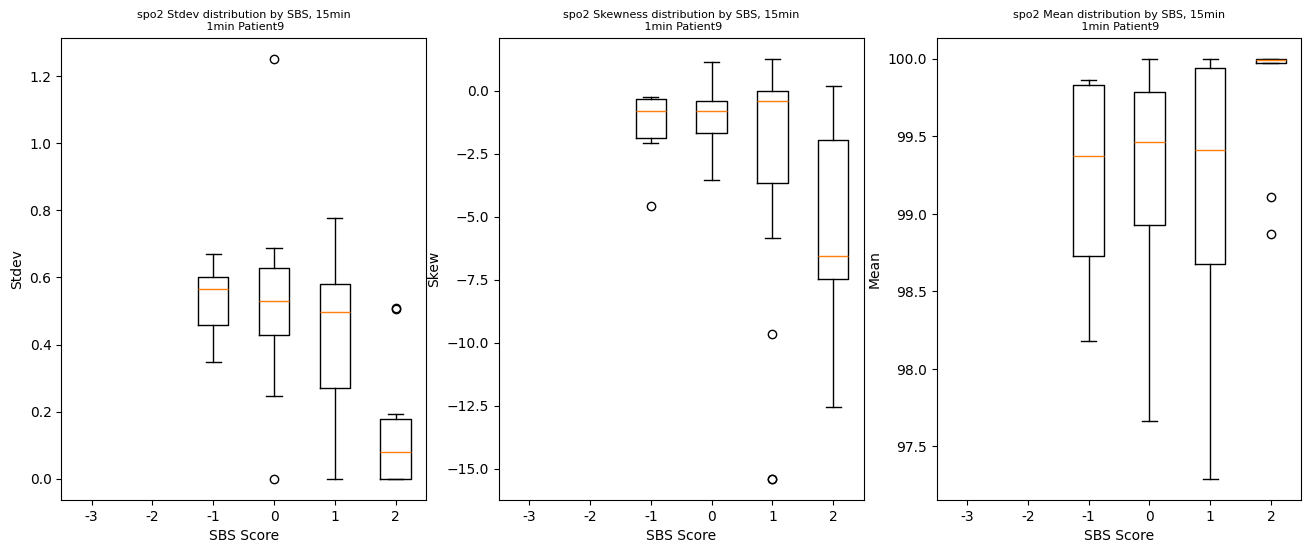

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.0044671834372583
P-value: 0.3408204896126845
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.07608786340712306
P-value: 0.9404644393928961

T-test for mean values between SBS Score -1 and 1:
T-statistic: 0.8580476060245429
P-value: 0.4124268526688021
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.14804557133323656
P-value: 0.8839257609588568

T-test for mean values between SBS Score -1 and 2:
T-statistic: 1.3405870509250446
P-value: 0.20315487737102056
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.2897863187426457
P-value: 0.24460520875688455

T-test for mean values between SBS Score 0 and 1:
T-statistic: 2.9036429204430614
P-value: 0.006997391574974611
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.23931739634666319
P-value: 0.8123668462979

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

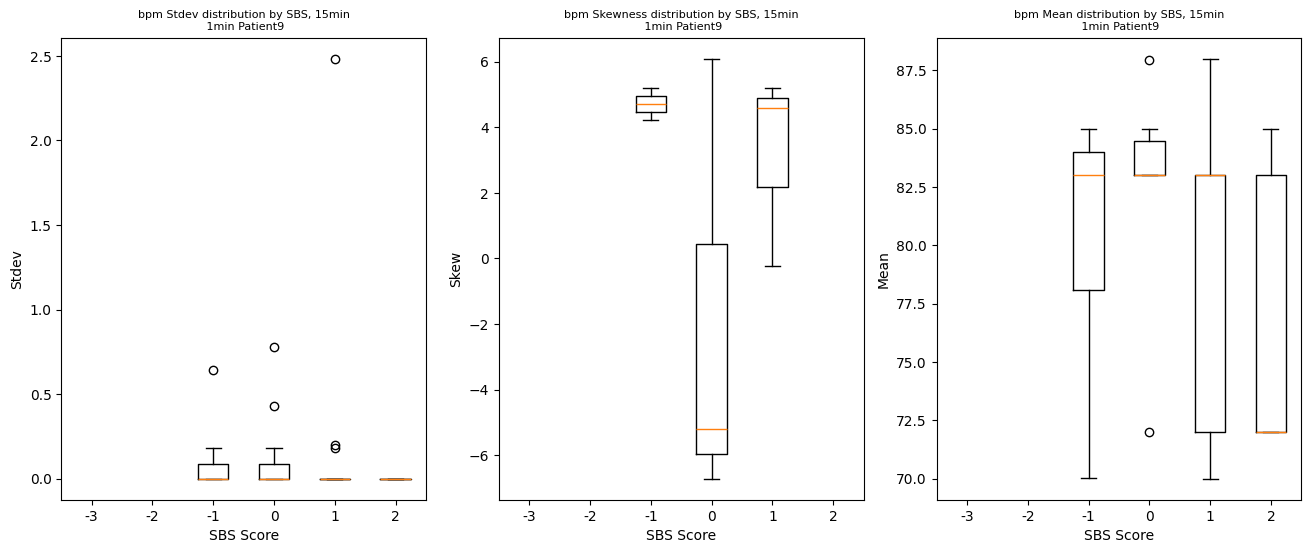

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.4372330146444845
P-value: 0.17862256682876385
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.8512848914694905
P-value: 0.4111941089190001

T-test for mean values between SBS Score -1 and 1:
T-statistic: 0.2902303351377248
P-value: 0.7776426993898247
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.23967497657847653
P-value: 0.8121046896033575

T-test for mean values between SBS Score -1 and 2:
T-statistic: 1.3867392819919178
P-value: 0.19092973898564036
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.541104092445411
P-value: 0.17422543547766964

T-test for mean values between SBS Score 0 and 1:
T-statistic: 2.4159696746003694
P-value: 0.0234520581469665
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.6529817069673725
P-value: 0.5228644846830985

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

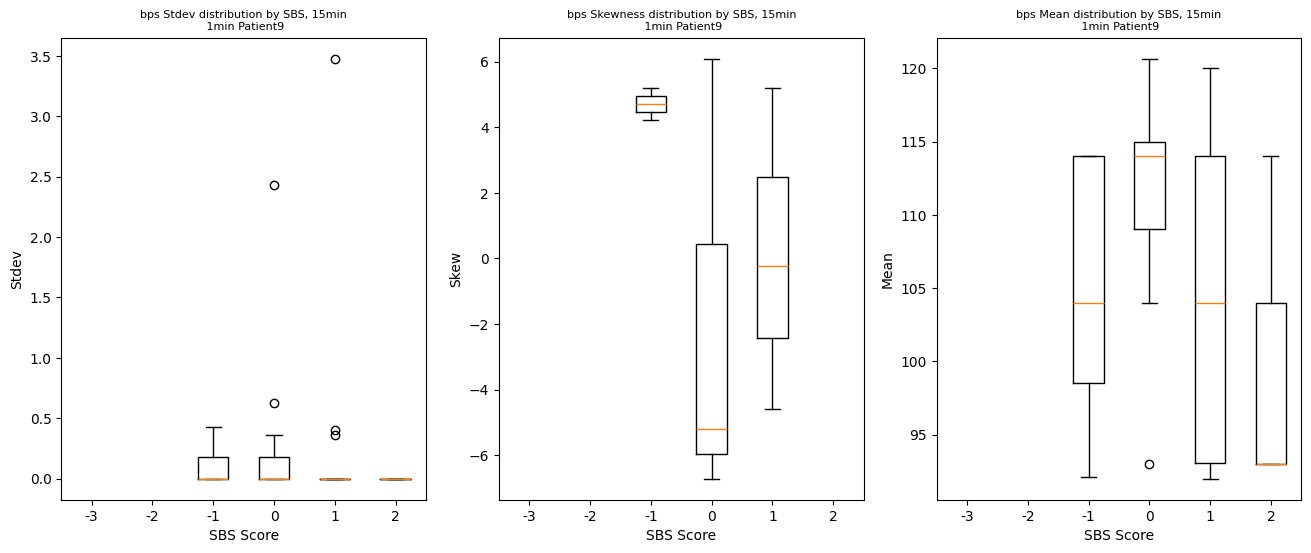

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.33527534688263866
P-value: 0.7439152810541758
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.21963079640187042
P-value: 0.8310854865122892

T-test for mean values between SBS Score -1 and 1:
T-statistic: 1.1206350684418964
P-value: 0.2941968097403647
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.2200302291940301
P-value: 0.8296707330301849

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.9472708704320886
P-value: 0.36227858758001874
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.0000000000000002
P-value: 0.355917683749582

T-test for mean values between SBS Score 0 and 1:
T-statistic: 2.1370809141245197
P-value: 0.04557047801078744
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.020943280000200692
P-value: 0.9834067276139182

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

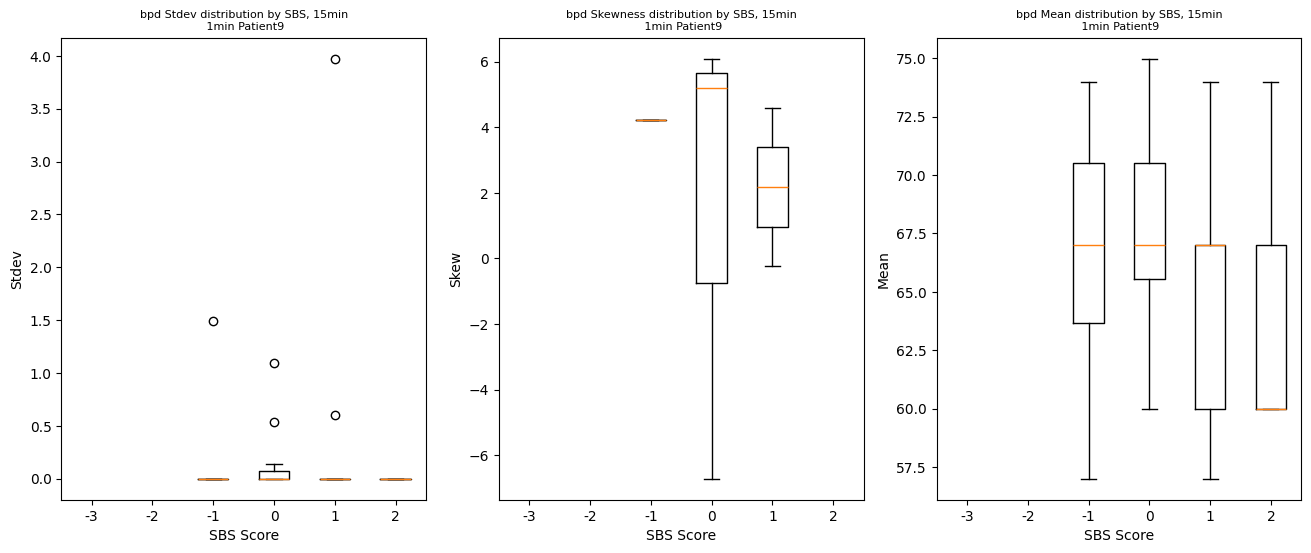

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -3.0143759737365587
P-value: 0.0025854675565933224



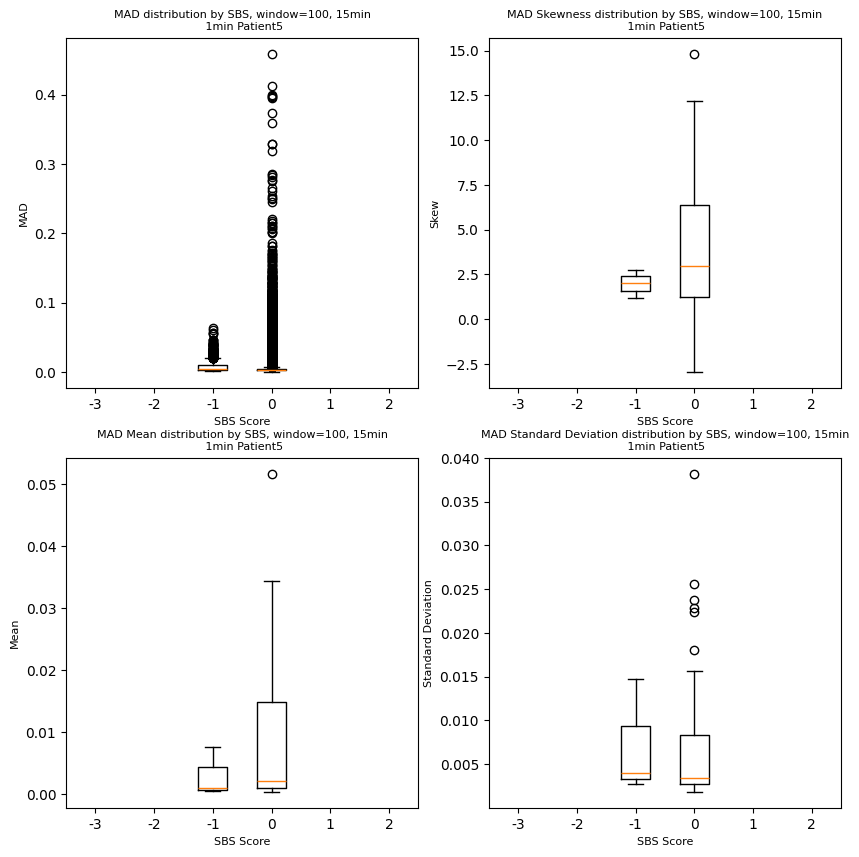

length of signal window for BoxPlot function: 480
not enough data at sbs index 17, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.41273175872823314
P-value: 0.7153596125738821
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.6653908161002604
P-value: 0.5459926222865654



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

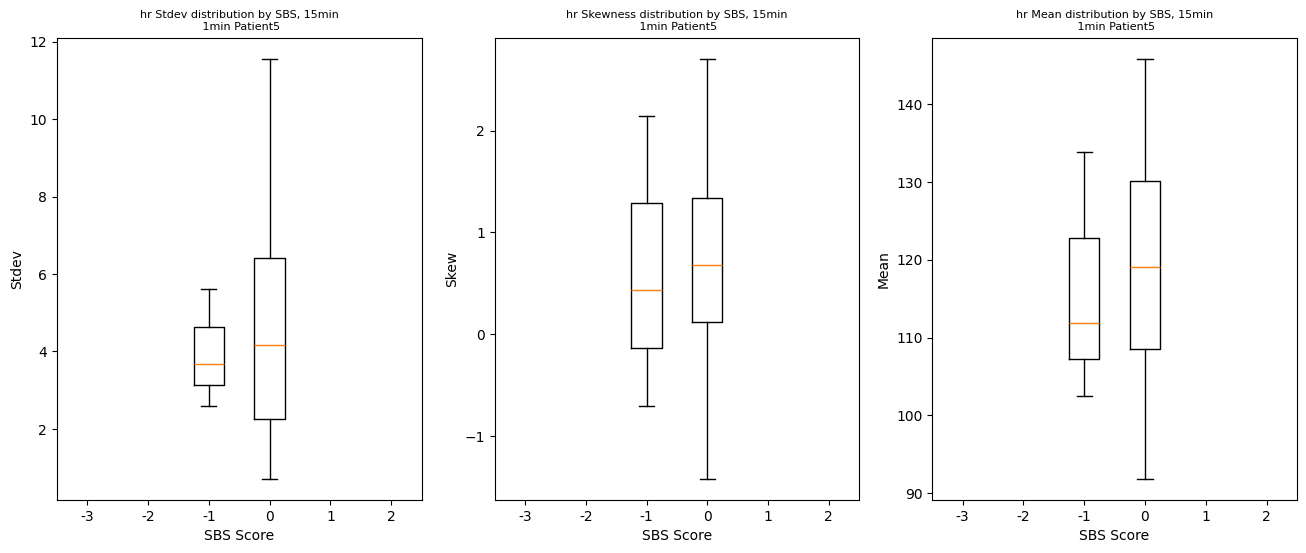

length of signal window for BoxPlot function: 480
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 17, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 23, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 27, flag_list detected
not enough data at sbs index 29, flag_list detected
not enough data at sbs index 31, flag_list detected
not enough data at sbs index 32, flag_list detected
not enough data at sbs index 36, flag_list detected
not enough data at sbs index 37, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

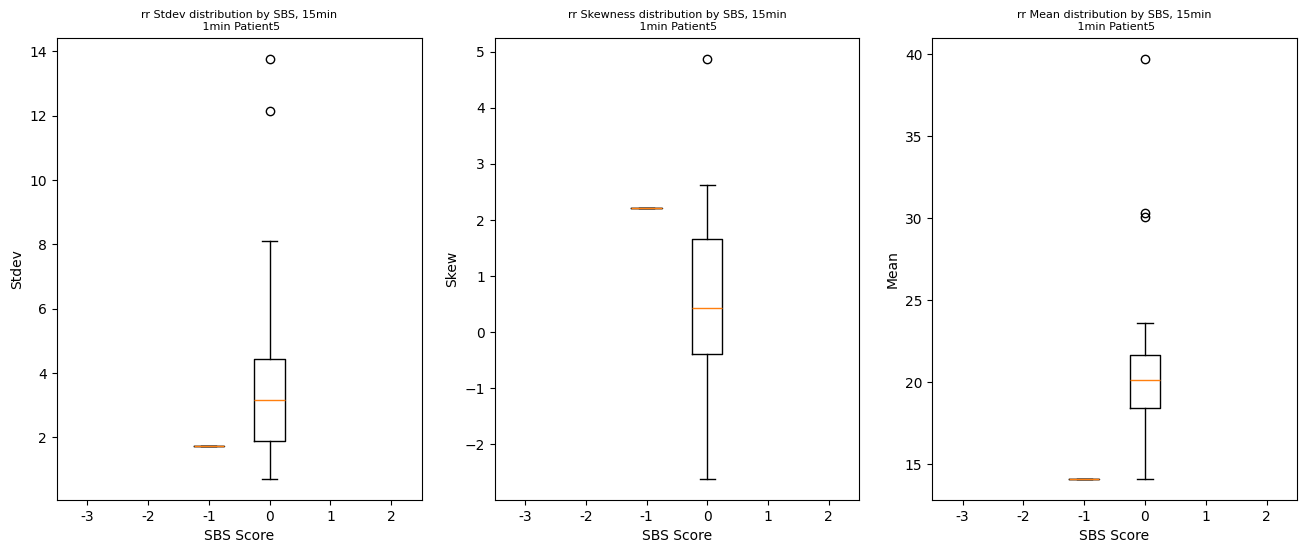

length of signal window for BoxPlot function: 480
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 21, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: 1.2610493472600148
P-value: 0.3049682171720404
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.8581967859183213
P-value: 0.08058678793144966



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

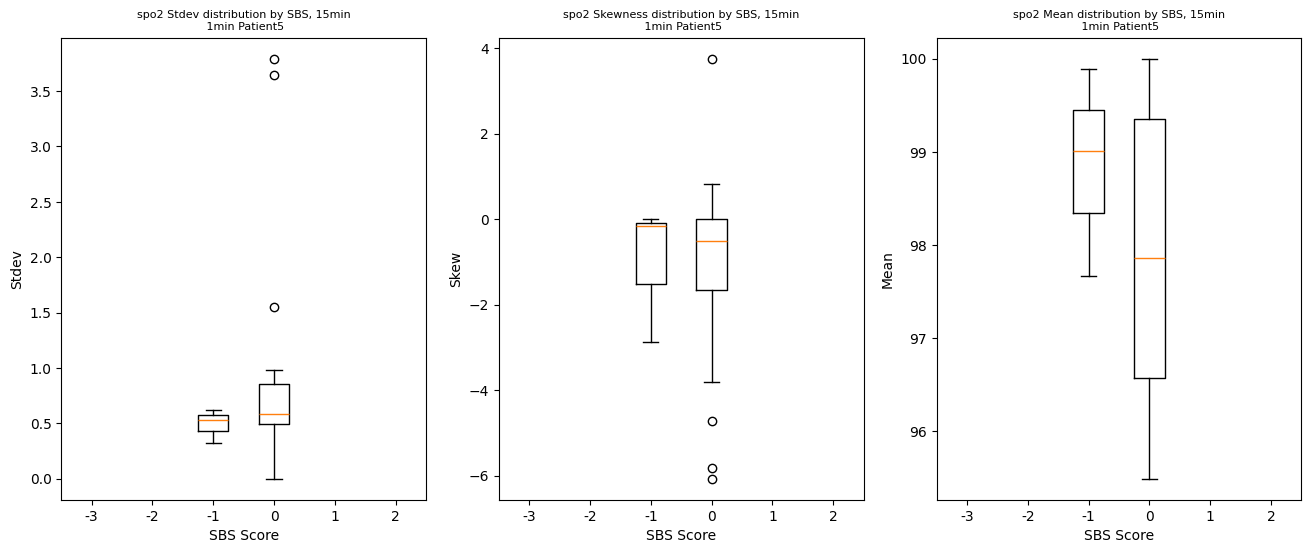

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -4.918194388161248
P-value: 2.0534951375620977e-05
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.9999999999999999
P-value: 0.3241743423860388



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

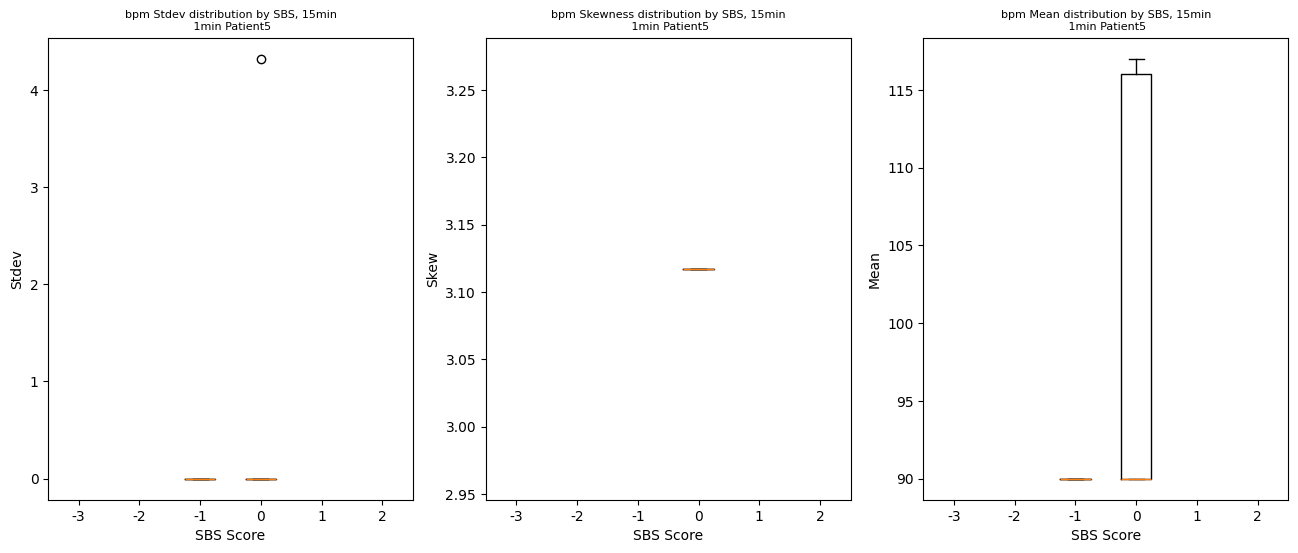

length of signal window for BoxPlot function: 480
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 26, flag_list detected
not enough data at sbs index 27, flag_list detected
not enough data at sbs index 28, flag_list detected
not enough data at sbs index 29, flag_list detected
not enough data at sbs index 30, flag_list detected
not enough data at sbs index 31, flag_list detected
not enough data at sbs index 32, flag_list detected
not enough data at sbs index 33, flag_list detected
not enough data at sbs index 34, flag_list detected
not enough data at sbs index 35, flag_list detected
not enough data at sbs index 36, flag_list detected
not enough data at sbs index 37, flag_list detected
not enough data at sbs index 38, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

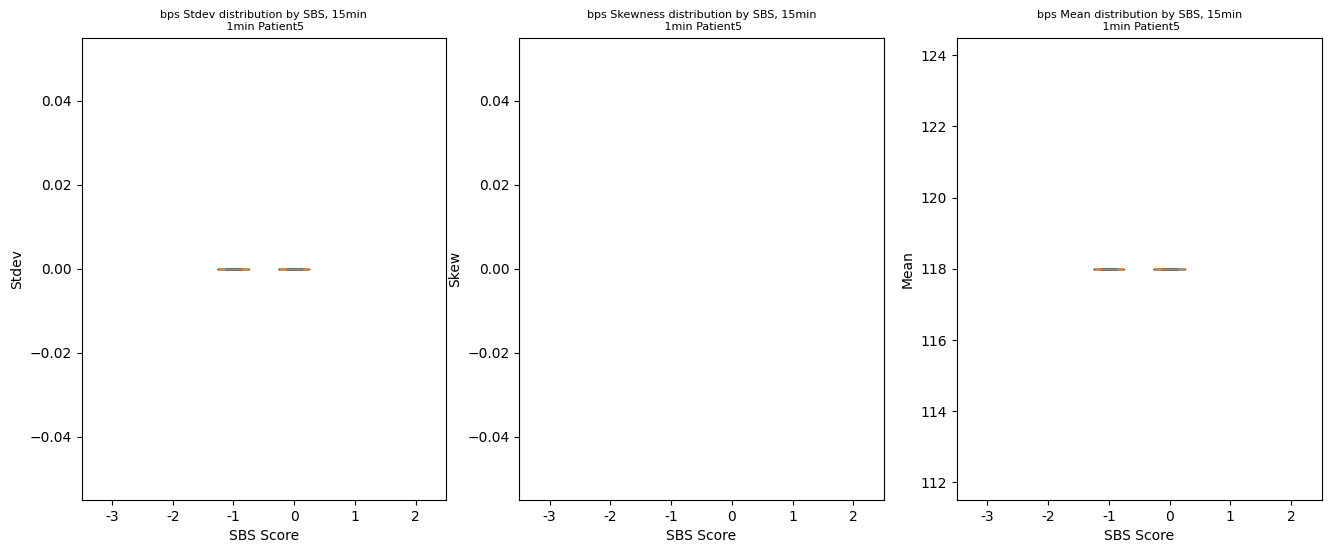

length of signal window for BoxPlot function: 480
not enough data at sbs index 28, flag_list detected
not enough data at sbs index 29, flag_list detected
not enough data at sbs index 30, flag_list detected
not enough data at sbs index 31, flag_list detected
not enough data at sbs index 32, flag_list detected
not enough data at sbs index 33, flag_list detected
not enough data at sbs index 34, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

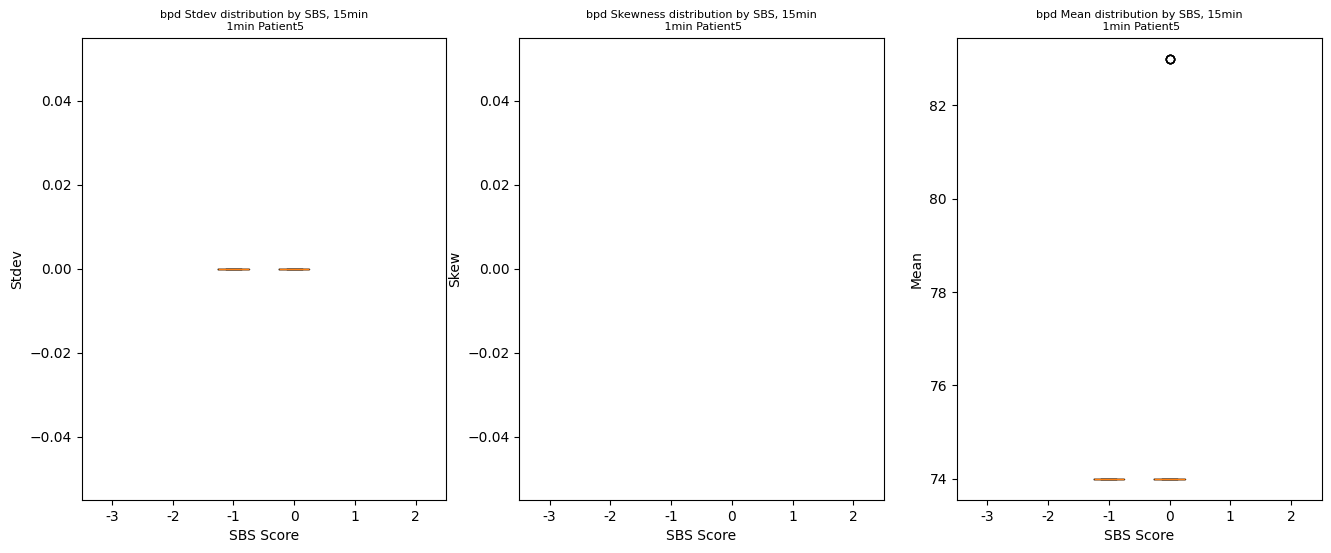

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 2.804819081503905
P-value: 0.005038992254482334

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -3.671628760186897
P-value: 0.0002414249178324126

T-test for MAD values between SBS Score -1 and 2:
T-statistic: -10.947034130796172
P-value: 7.695523866021762e-28

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -8.370598004730025
P-value: 5.837520281111671e-17

T-test for MAD values between SBS Score 0 and 2:
T-statistic: -16.959141807697904
P-value: 2.893502596068467e-64

T-test for MAD values between SBS Score 1 and 2:
T-statistic: -8.58521652204852
P-value: 9.323289687866445e-18



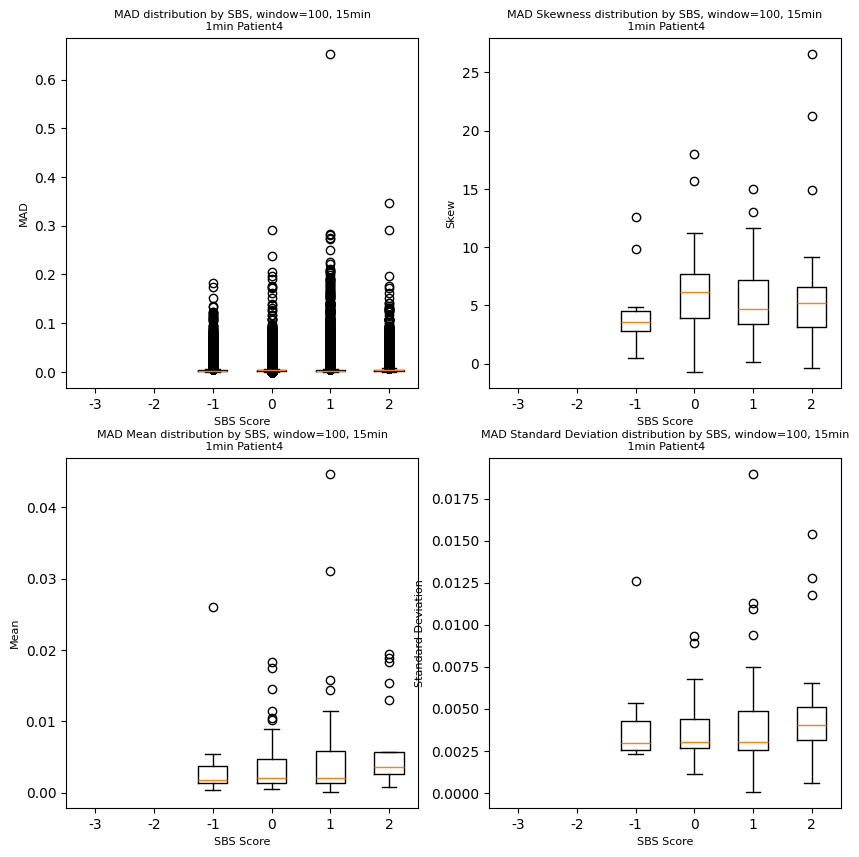

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 44, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 70, flag_list detected
not enough data at sbs index 74, flag_list detected
not enough data at sbs index 75, flag_list detected
not enough data at sbs index 108, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.5780446719446541
P-value: 0.12564419385858758
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.2720010702218525
P-value: 0.2117722232777482

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.8697479688444437
P-value: 0.3913498621204985
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -1.9768085386808043
P-value: 0.05756129562114277

T-test for mean values between SBS Score -1 and 2:
T-st

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

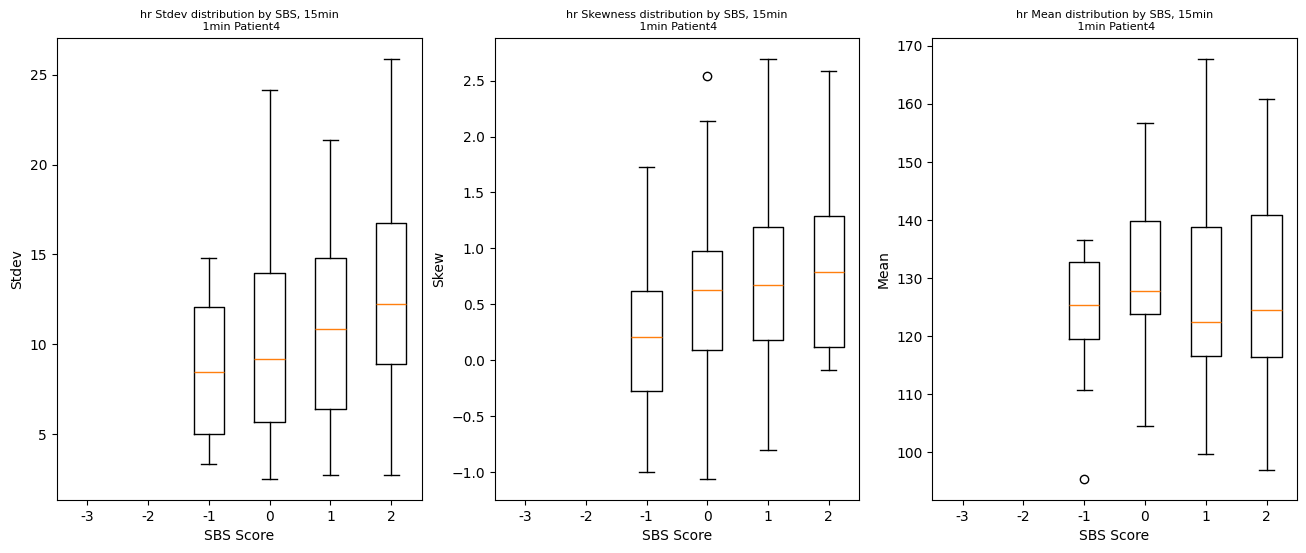

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 41, flag_list detected
not enough data at sbs index 43, flag_list detected
not enough data at sbs index 44, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 47, flag_list detected
not enough data at sbs index 48, flag_list detected
not enough data at sbs index 50, flag_list detected
not enough data at sbs index 61, flag_list detected
not enough data at sbs index 66, flag_list detected
not enough data at sbs index 70, flag_list detected
not enough data at sbs index 71, flag_list detected
not enough data at sbs index 74, flag_list detected
not enough data at sbs index 75, flag_list detected
not enough data a

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

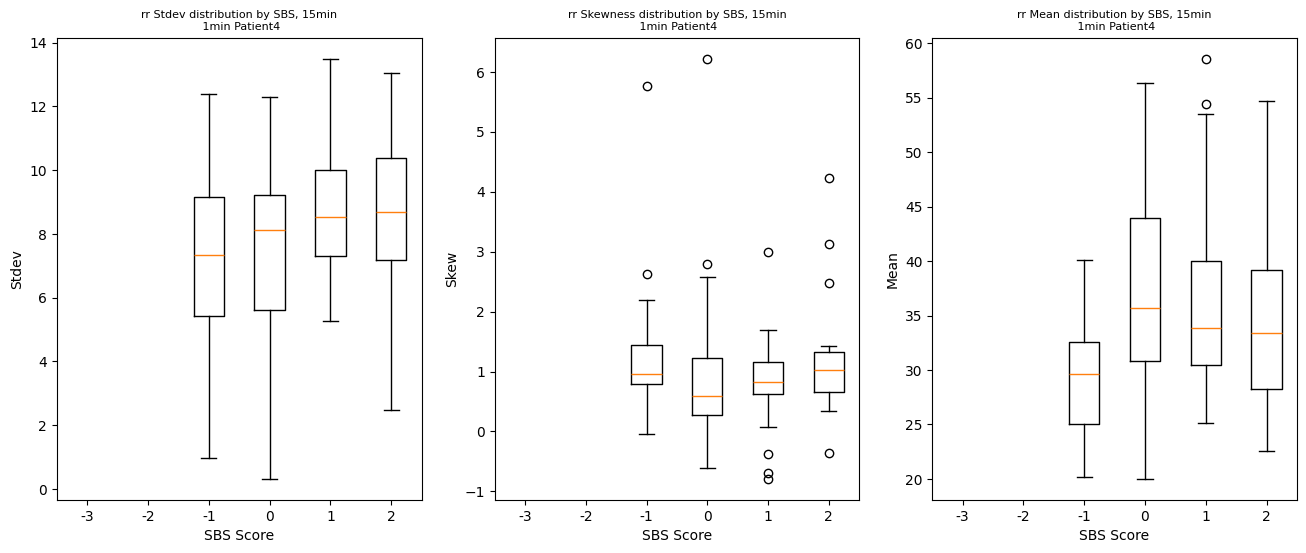

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 48, flag_list detected
not enough data at sbs index 70, flag_list detected
not enough data at sbs index 75, flag_list detected
not enough data at sbs index 76, flag_list detected
not enough data at sbs index 78, flag_list detected
not enough data at sbs index 83, flag_list detected
not enough data at sbs index 111, flag_list detected
not enough data at sbs index 112, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.9083198368156176
P-value: 0.3708647778577351
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.3641816824124934
P-value: 0.7200174547981659

T-test for mean values between SBS Score -1 and 1:
T-statistic: 0.8224262144090113
P-valu

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

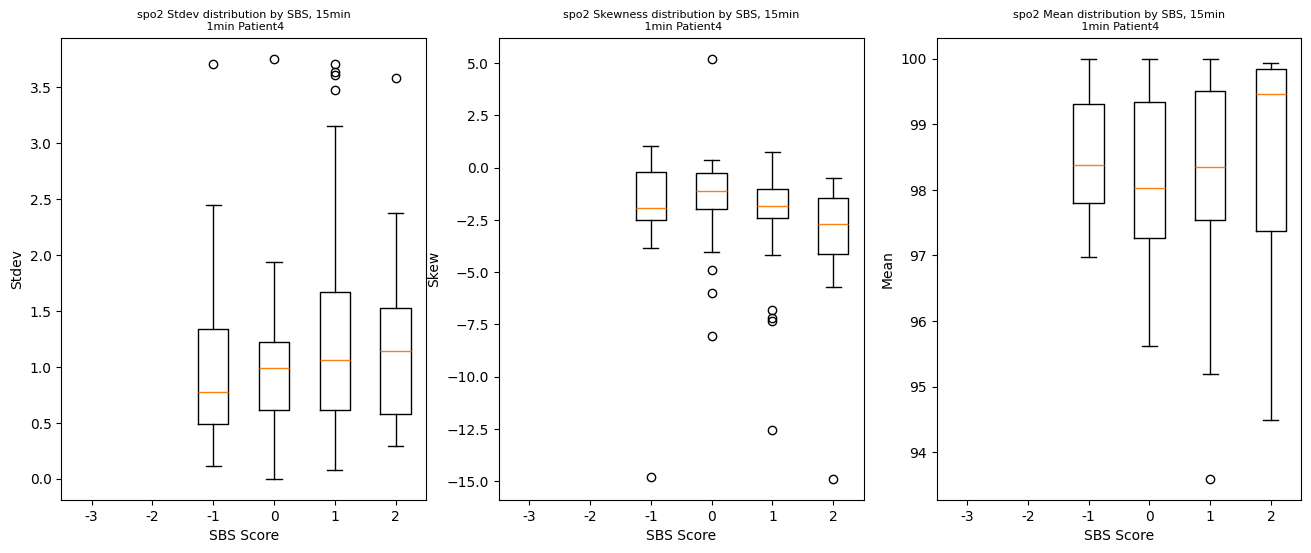

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 42, flag_list detected
not enough data at sbs index 43, flag_list detected
not enough data at sbs index 44, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 46, flag_list detected
not enough data at sbs index 47, flag_list detected
not enough data at sbs index 48, flag_list detected
not enough data at sbs index 49, flag_list detected
not enough data at sbs index 50, flag_list detected
not enough data at sbs index 51, flag_list detected
not enough data at sbs index 52, flag_list detected
not enough data at sb

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

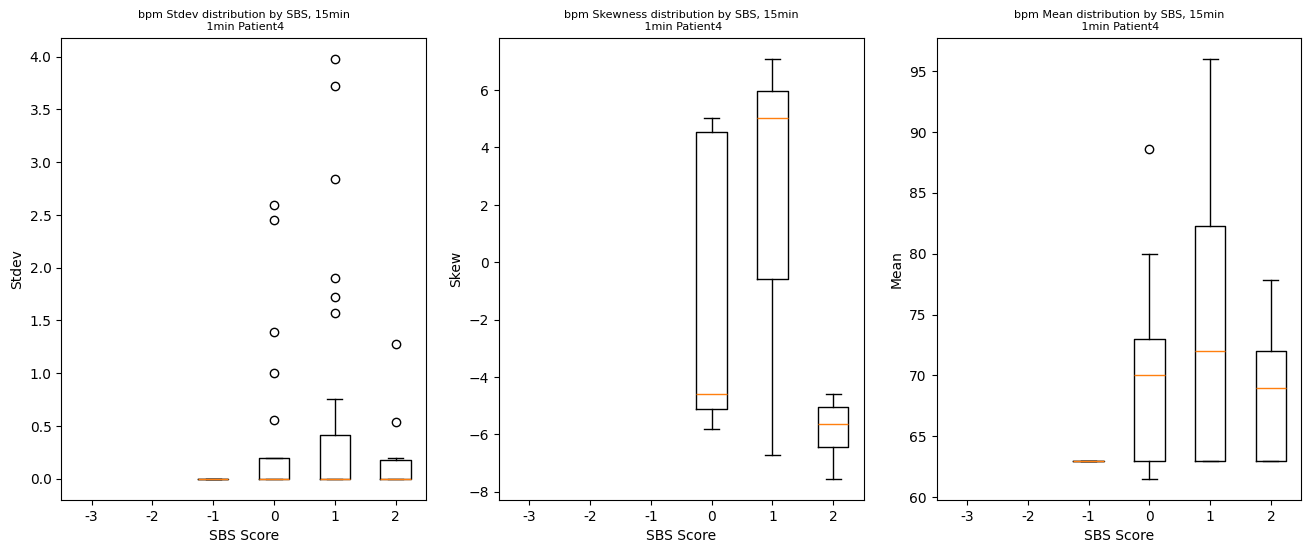

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.3202255035293644
P-value: 0.19378167322116535
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.043050219022313
P-value: 0.04991823538799974

T-test for mean values between SBS Score -1 and 1:
T-statistic: -4.135651468119148
P-value: 0.00013232985599513386
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -1.7635122878152605
P-value: 0.08585396237152647

T-test for mean values between SBS Score -1 and 2:
T-statistic: 1.5629330007100555
P-value: 0.1271243312274994

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

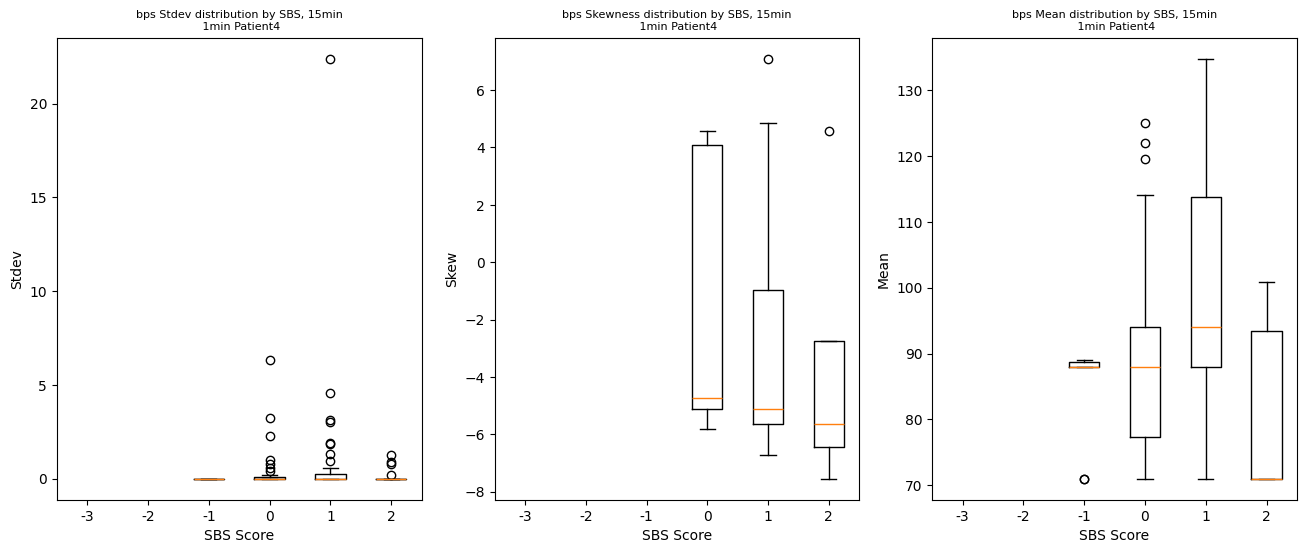

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 90, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.6102860279477886
P-value: 0.11490853420410271
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.3628324773604747
P-value: 0.024815728597004

T-test for mean values between SBS Score -1 and 1:
T-statistic: -3.4138338437181757
P-value: 0.0014100307010997128
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -3.2827030050921424
P-value: 0.0022502661257471053

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.2832233032135496
P-value: 0.7787237295837429
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -1.8741226098943742
P-value: 0.07425586963156126

T-test for mean values between SBS Score 0 and 1:
T-statistic: -1.5213000968529902
P-value: 0.1330952531950249
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.14206011826198336
P-value: 0.887561113655546

T-test for mean values between SBS Score 

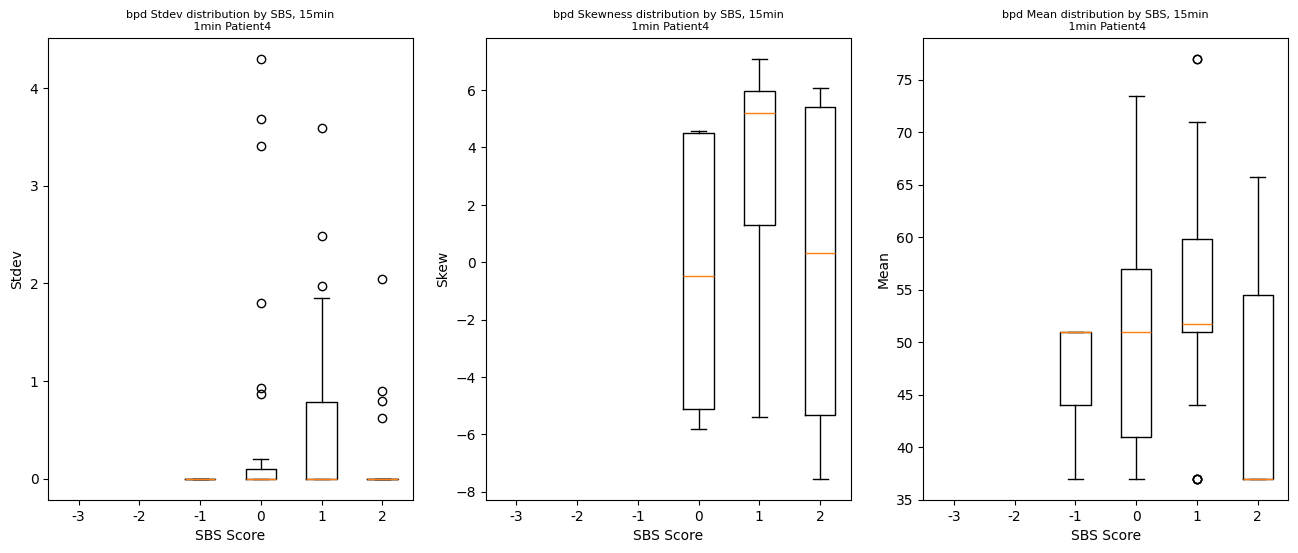

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -33.03541586116361
P-value: 2.9694905715396106e-231

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -44.48966744168227
P-value: 0.0

T-test for MAD values between SBS Score -1 and 2:
T-statistic: -36.544965739055215
P-value: 2.926201589277533e-242

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -30.17112779617635
P-value: 7.457591736133459e-193

T-test for MAD values between SBS Score 0 and 2:
T-statistic: -24.87504298773501
P-value: 1.1993518034063666e-125

T-test for MAD values between SBS Score 1 and 2:
T-statistic: 0.61642784019783
P-value: 0.5376315600677203



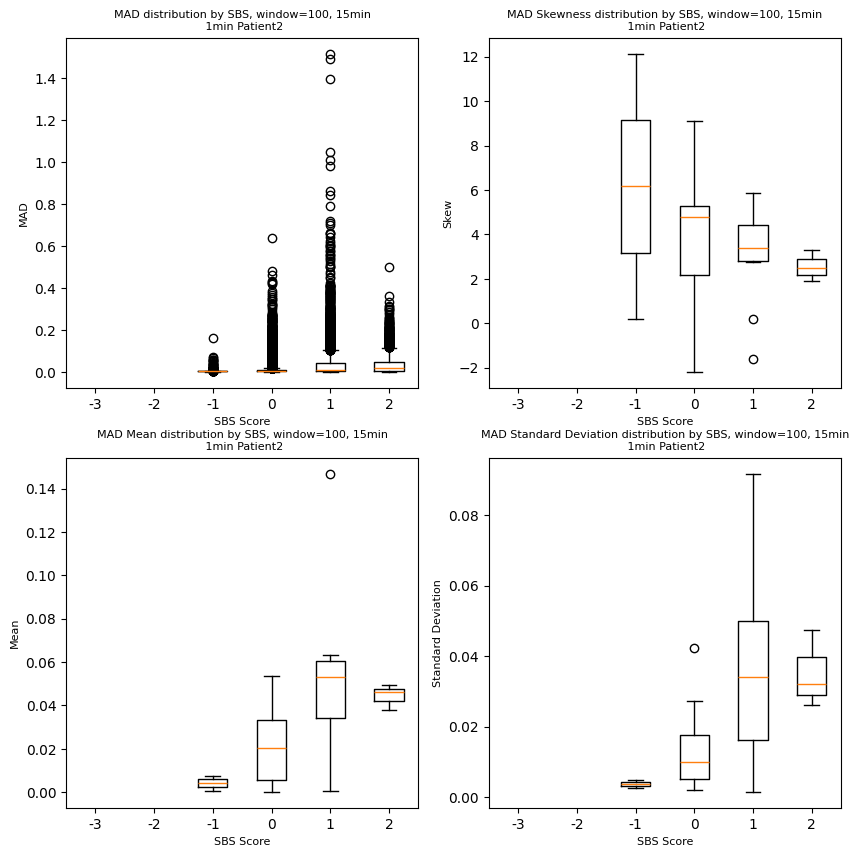

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 23, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 27, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.8690262325906857
P-value: 0.09895229610538332
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.033655994987465
P-value: 0.3816047444169523

T-test for mean values between SBS Score -1 and 1:
T-statistic: -2.342738189015058
P-value: 0.051271840967415314
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -2.4937709442883627
P-value: 0.07289484517489146

T-test for mean values between SBS Score -1 and 2:
T-statistic: -3.8539705281859162
P-value: 0.06173589796617337
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -1.9667352589675622


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

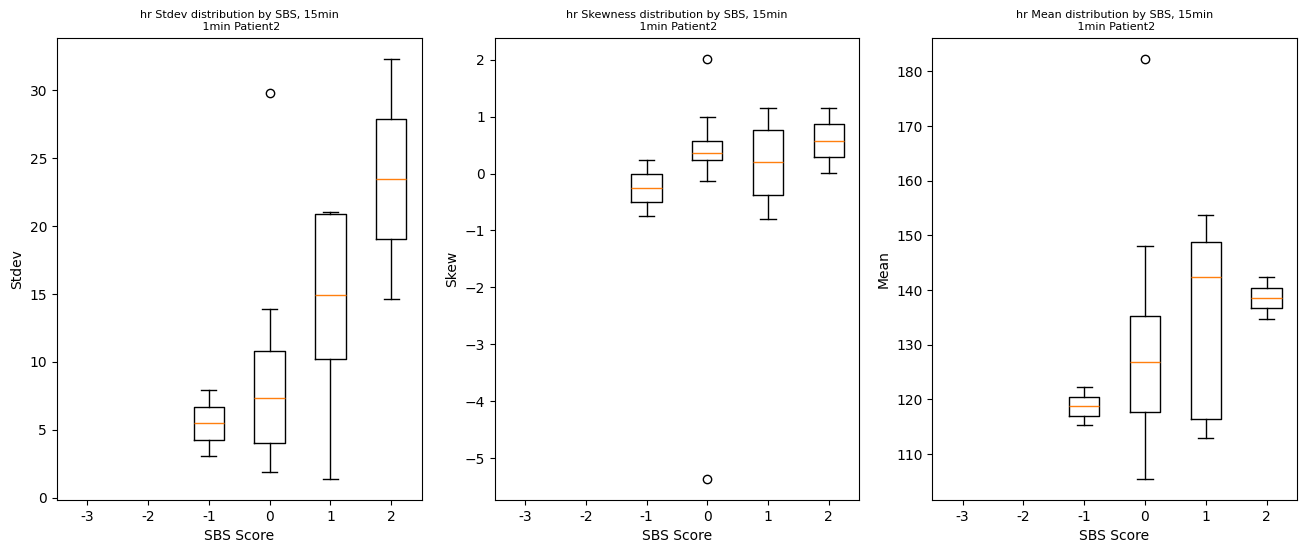

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 23, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 26, flag_list detected
not enough data at sbs index 27, flag_list detected
not enough data at sbs index 29, flag_list detected
T-test for mean value

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

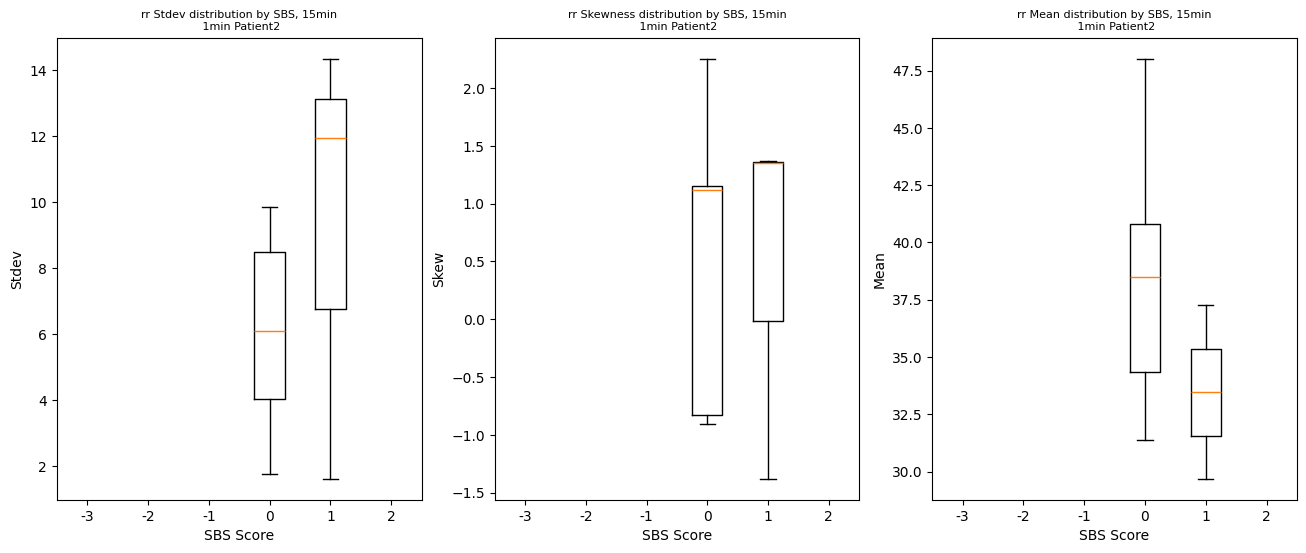

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 27, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.38445356020780846
P-value: 0.7535953512517701
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.5121201697234542
P-value: 0.6682032617332445

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.30793932567844245
P-value: 0.8037030737861142
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -1.4438823952546178
P-value: 0.20573746004638918

T-test for mean values between SBS Score -1 and 2:
T-statistic: -0.7531622186156686
P-value: 0.5319464895198232
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -2.6989531540843927
P-value: 0.0743388106193233

T-test for mean values be

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

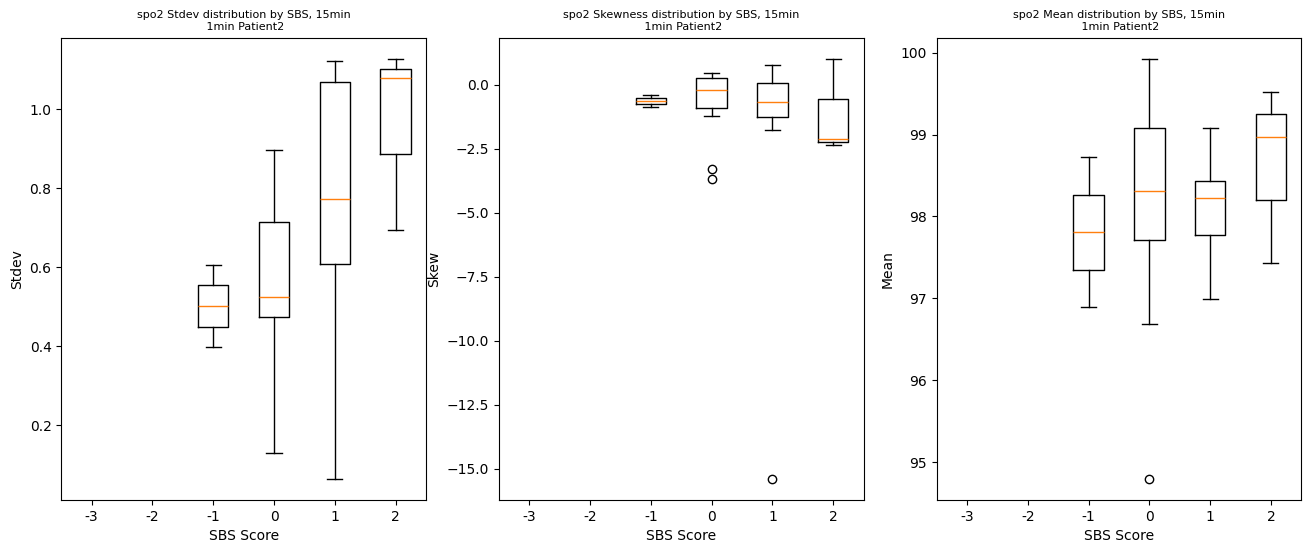

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.4239262943987046
P-value: 0.7341217877297206
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.8058405963264423
P-value: 0.5089316363720491
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.447213595499958
P-value: 0.7092107186133106

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.07532094632991994
P-value: 0.94860357061908
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score 0 and 1:
T-statistic: -0.7163118962959998
P-value: 0.4856804942150723
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -1.0
P-value: 0.343436396137

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

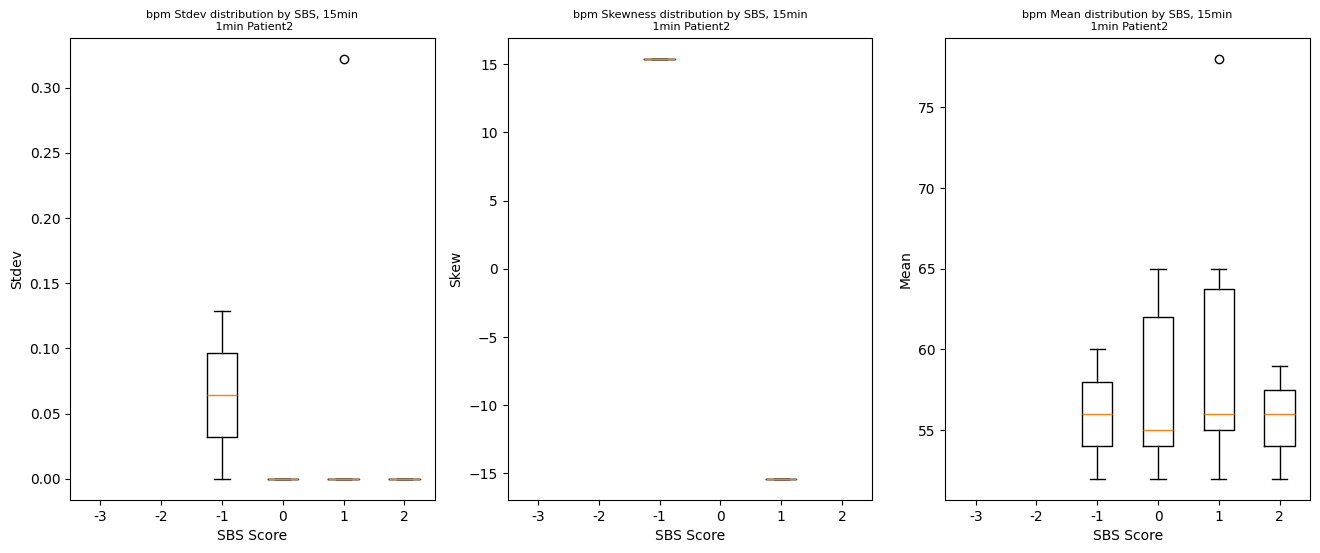

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.2621739339136429
P-value: 0.38665682450453404
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score -1 and 1:
T-statistic: -1.0597724109717188
P-value: 0.45659314491477165
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.7844645405527362
P-value: 0.5683551208615284

T-test for mean values between SBS Score -1 and 2:
T-statistic: -0.5695285240303983
P-value: 0.6156155744115488
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.48564157181352724
P-value: 0.6320231517460743
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -1.0000000000000002
P-v

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

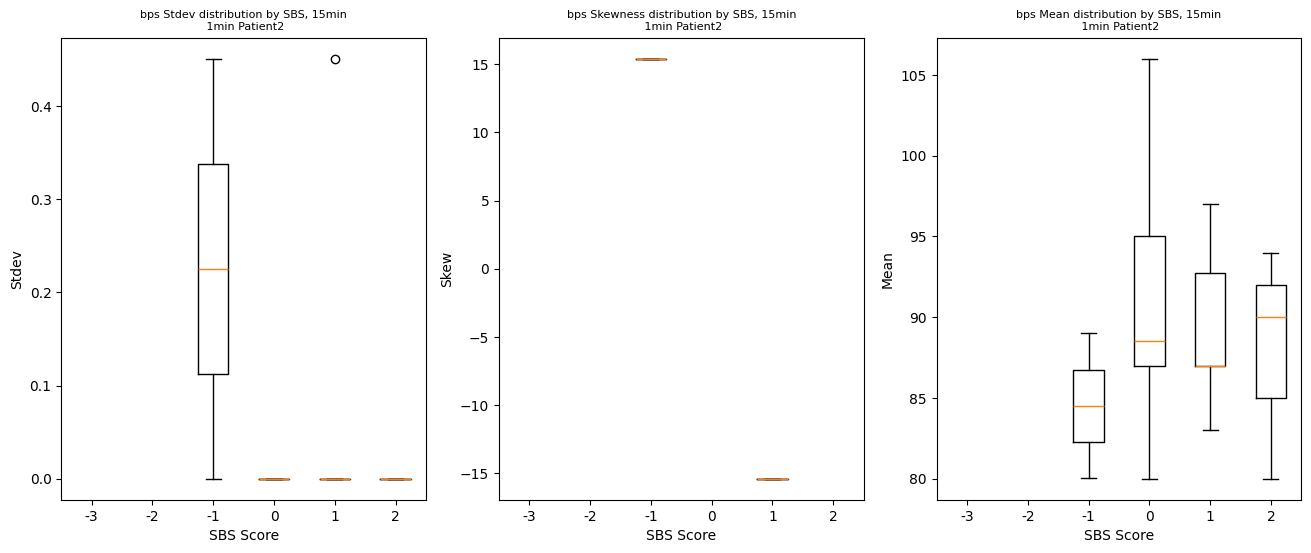

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.3462592131428287
P-value: 0.7780430934794957
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.8274090769992858
P-value: 0.4675884554783915
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.15617376188860604
P-value: 0.8873253304709952

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.22056148024811933
P-value: 0.854006717224296
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.0
P-value: 0.49999999999999956

T-test for mean values between SBS Score 0 and 1:
T-statistic: -0.772217778775035
P-value: 0.4552375101305418
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -1.0
P-value: 0.3434363961

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

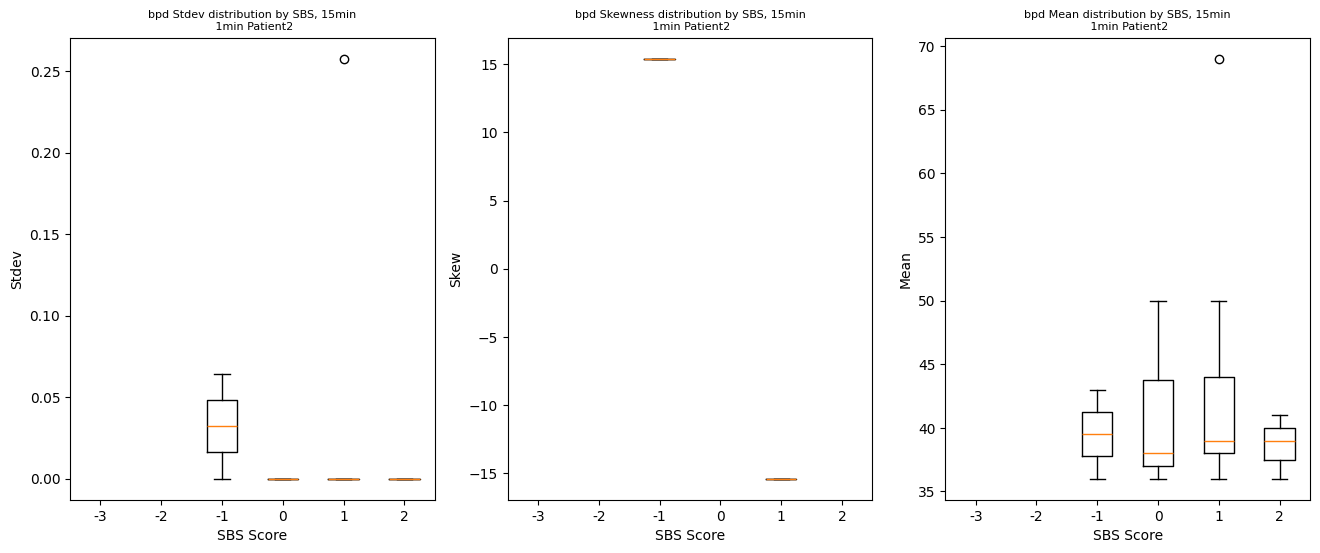

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

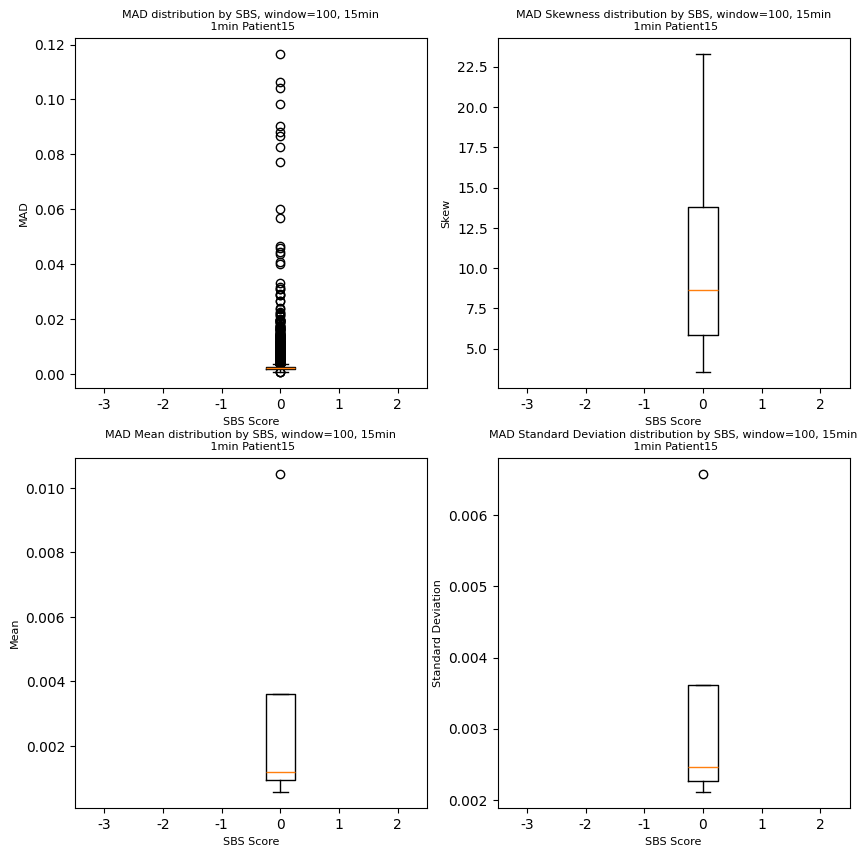

length of signal window for BoxPlot function: 480


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

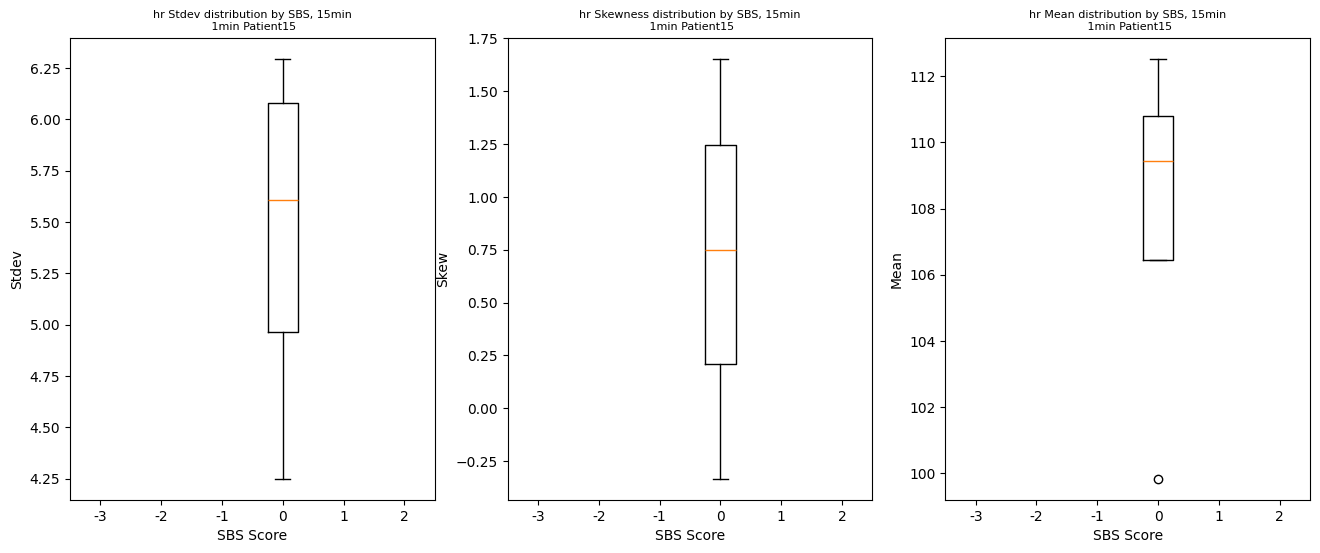

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

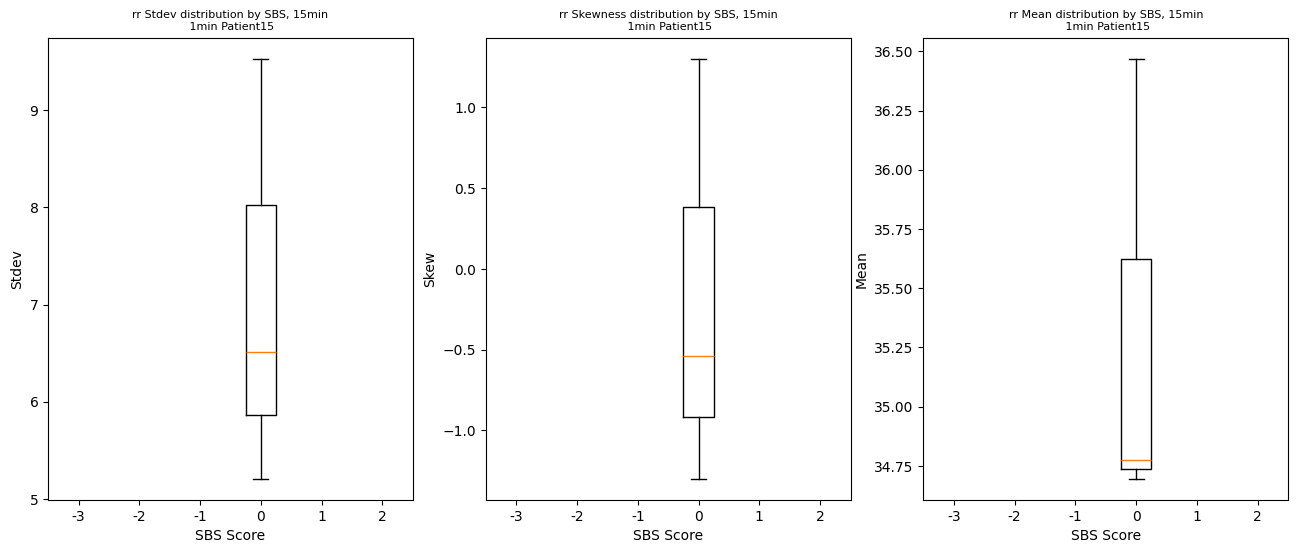

length of signal window for BoxPlot function: 480


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

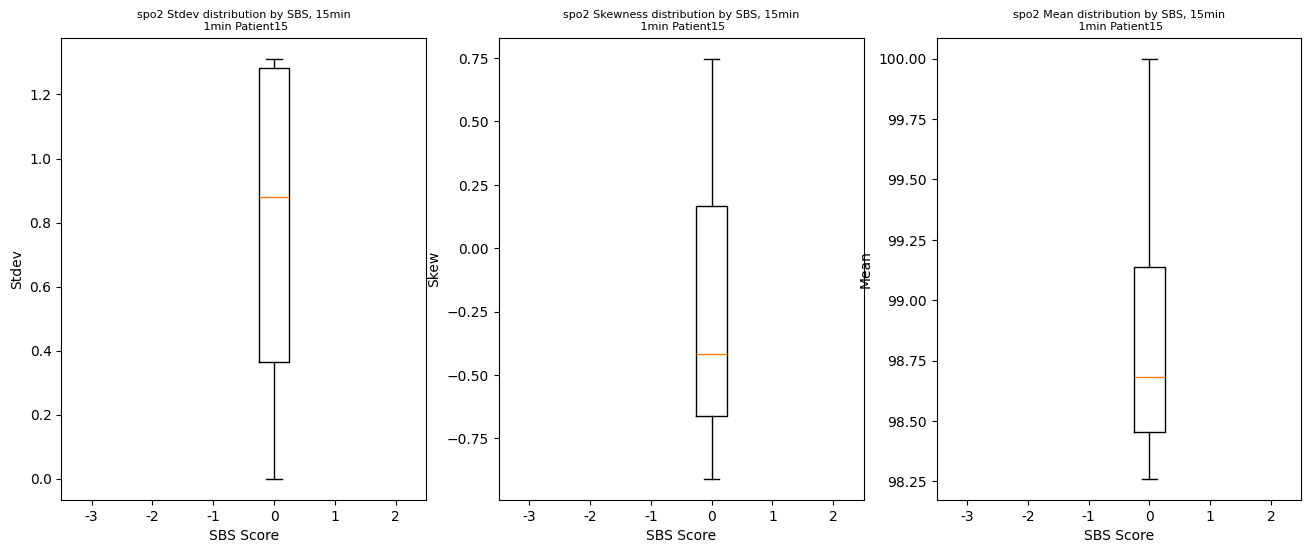

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

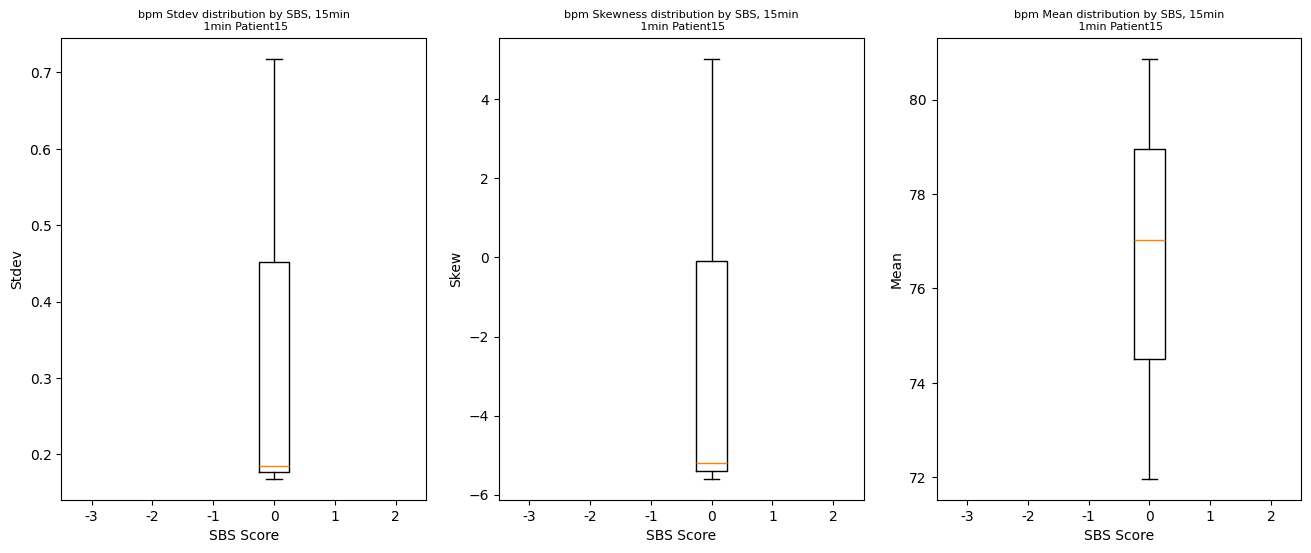

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

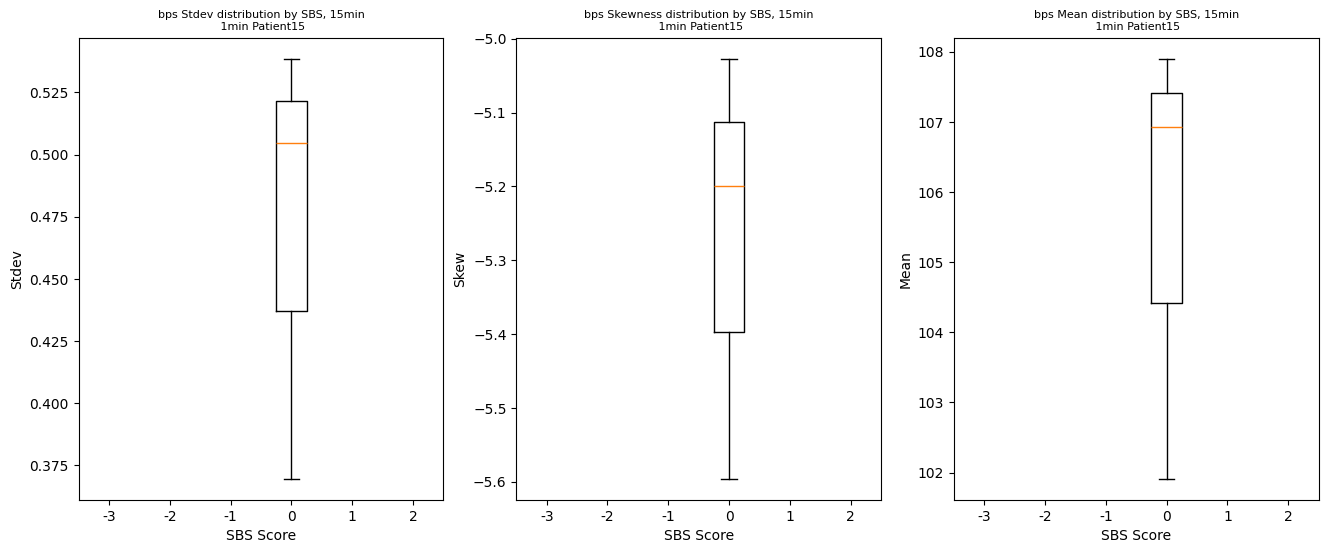

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

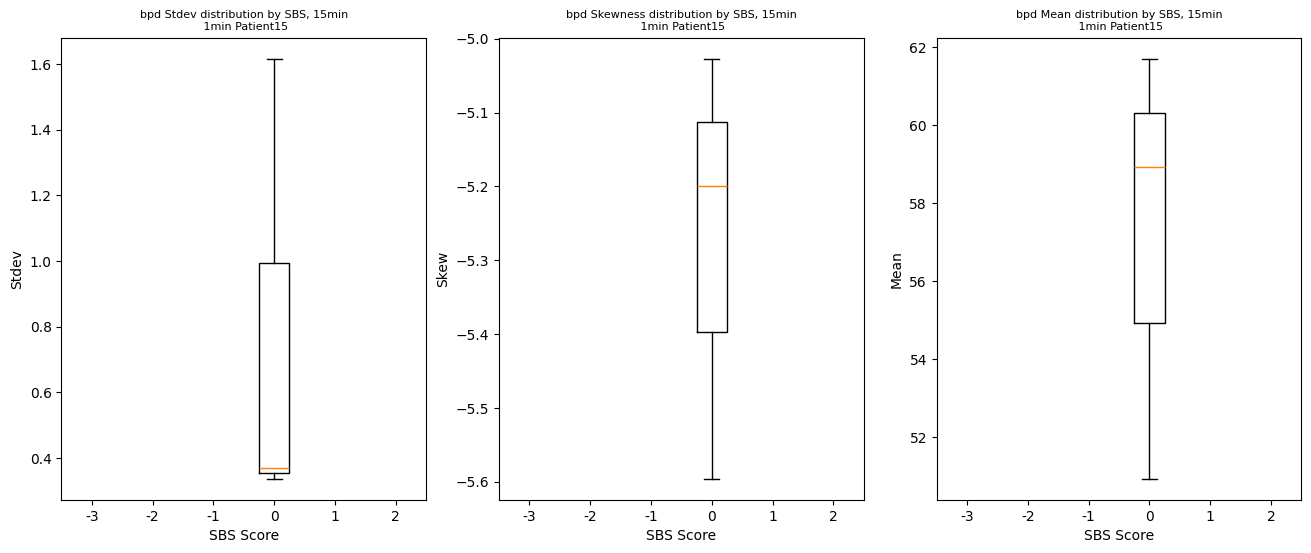

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -16.503320816450824
P-value: 7.799384861320768e-59

T-test for MAD values between SBS Score -1 and 1:
T-statistic: 10.457221030003584
P-value: 3.0757737056771583e-25

T-test for MAD values between SBS Score -1 and 2:
T-statistic: -20.2483291987754
P-value: 1.0713890047767843e-79

T-test for MAD values between SBS Score 0 and 1:
T-statistic: 35.18133033552566
P-value: 5.711509916027329e-246

T-test for MAD values between SBS Score 0 and 2:
T-statistic: -13.049920353604312
P-value: 2.562669154316108e-36

T-test for MAD values between SBS Score 1 and 2:
T-statistic: -26.4732848974156
P-value: 3.0330680270066303e-120



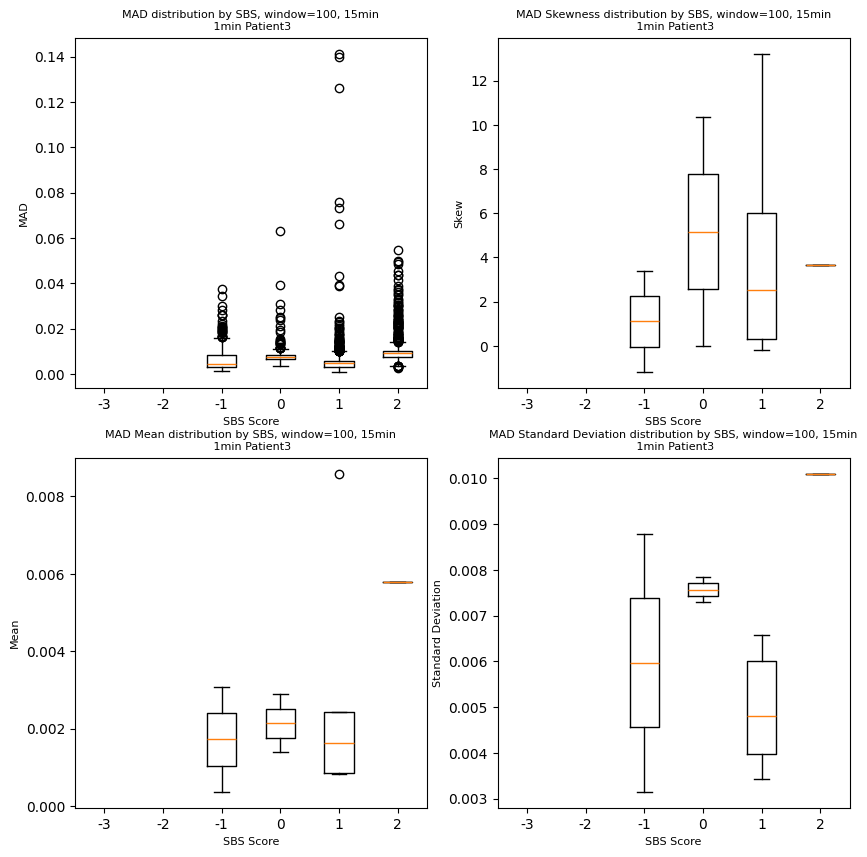

length of signal window for BoxPlot function: 480
not enough data at sbs index 8, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.1361137722421668
P-value: 0.4474951744717835
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.04754236456654827
P-value: 0.9673043880712171

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.8059084264867808
P-value: 0.45675982081094285
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.06654273344599433
P-value: 0.9568027524940554

T-test for mean values between SBS Score 0 and 1:
T-statistic: -0.5469759511943908
P-value: 0.6062016892062265
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.19591344258574378
P-value: 0.8697915813870378



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

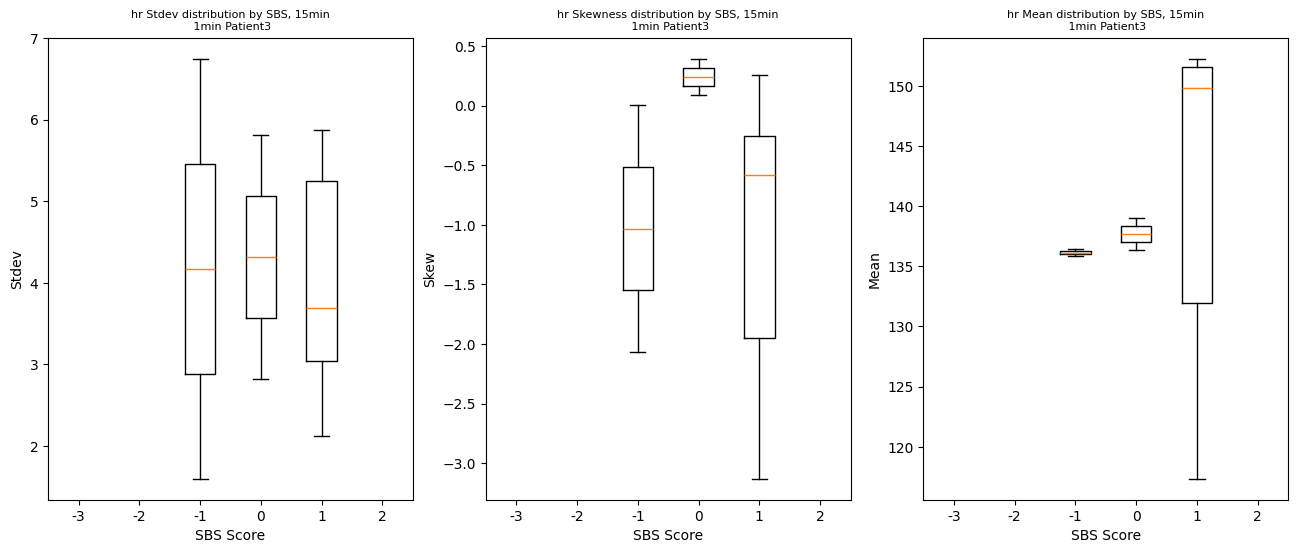

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

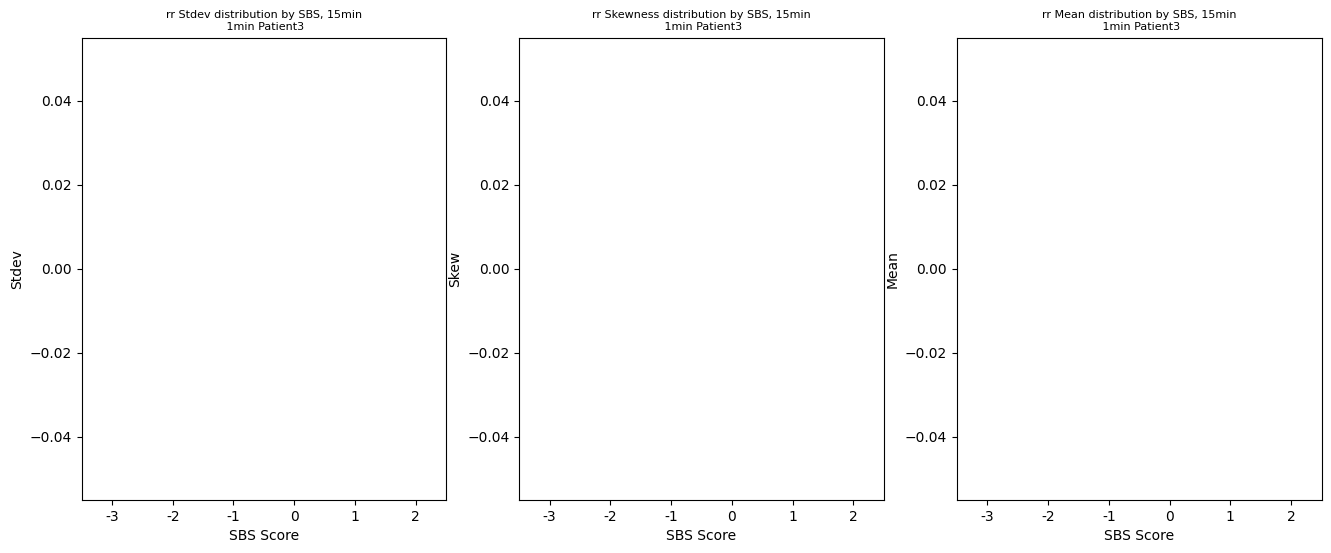

length of signal window for BoxPlot function: 480
not enough data at sbs index 8, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.8581469483550572
P-value: 0.5483210830358023
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.529952744260467
P-value: 0.6894539003898732

T-test for mean values between SBS Score -1 and 1:
T-statistic: 2.1616349756355877
P-value: 0.0830094515287781
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -2.006765526920529
P-value: 0.10085658555865121

T-test for mean values between SBS Score 0 and 1:
T-statistic: 1.8771301613274514
P-value: 0.11336566599870147
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -1.1238164955508148
P-value: 0.3278896949084951



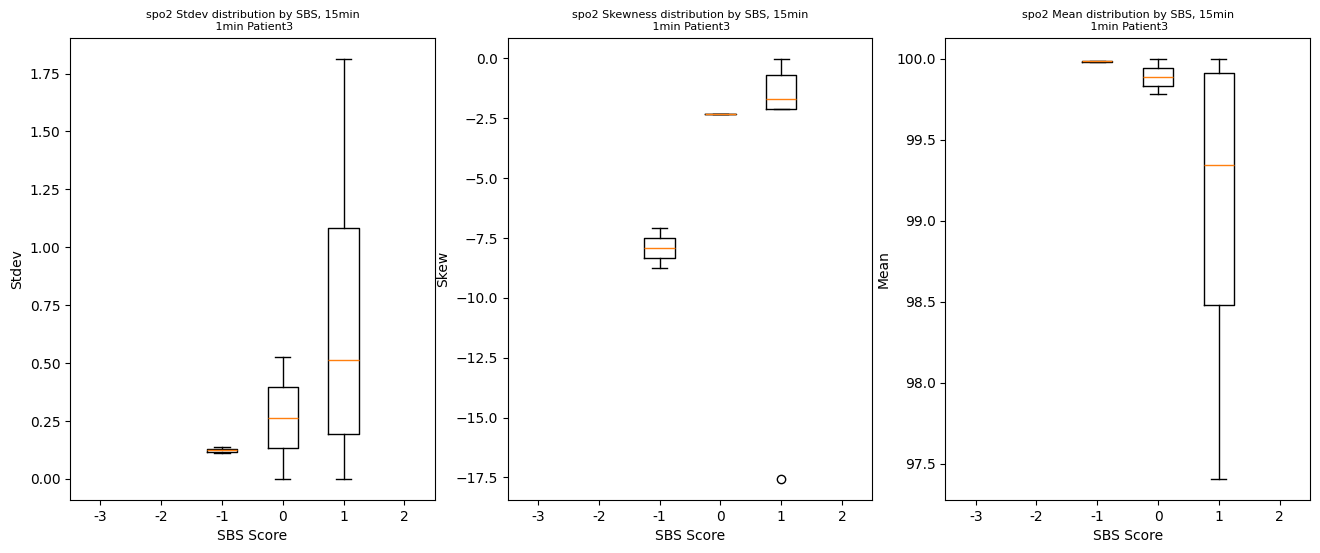

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

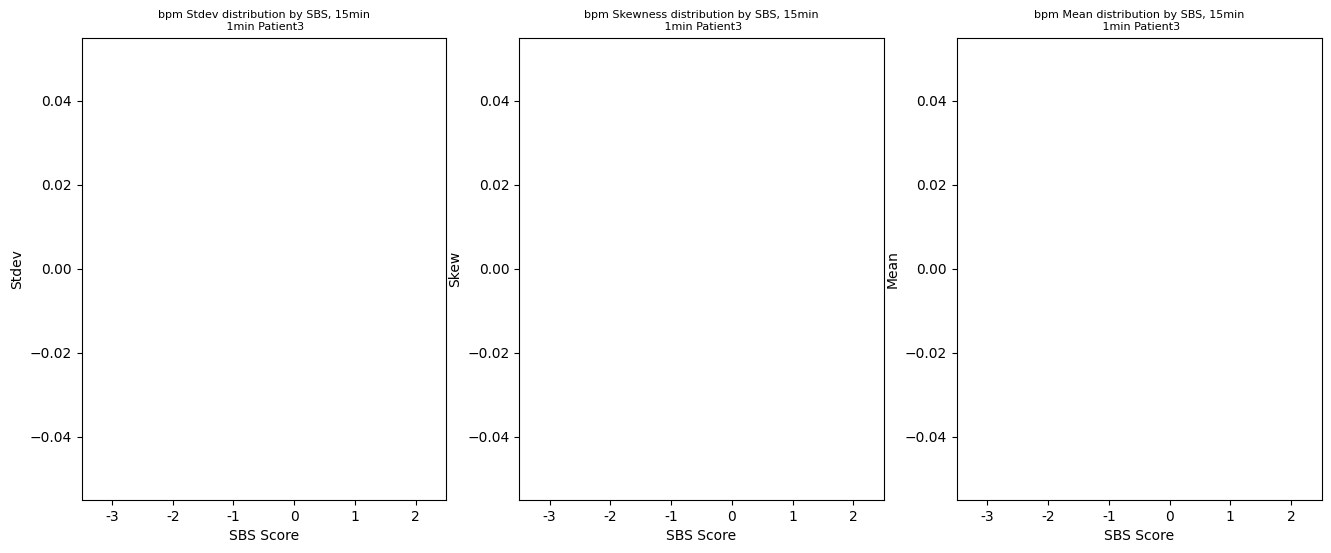

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

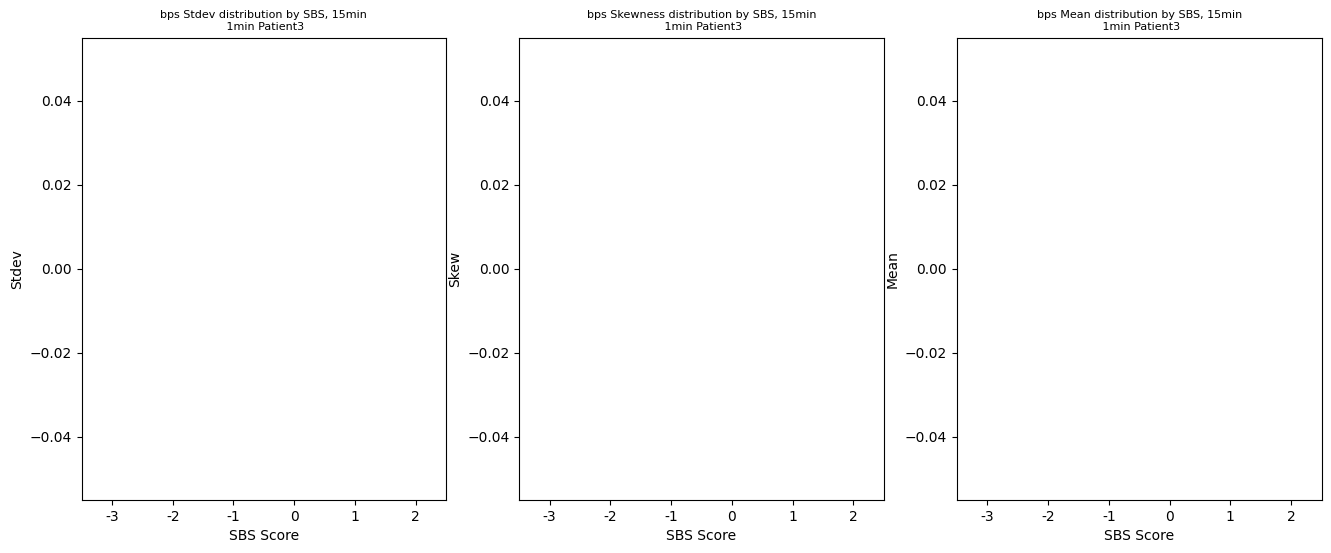

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

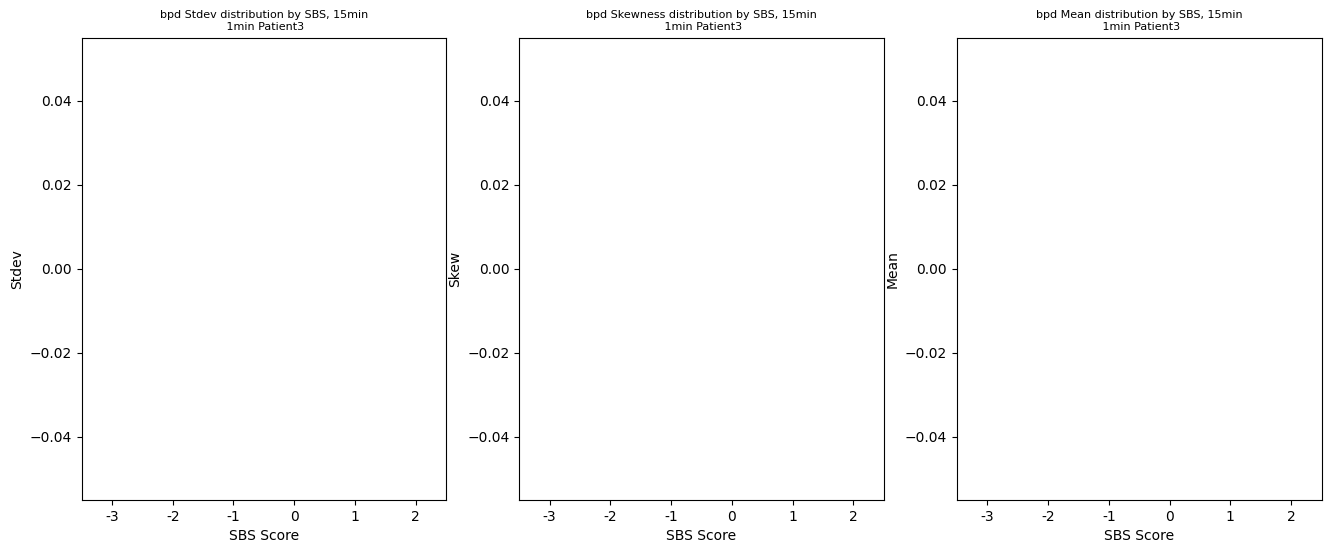

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 2.018409630323979
P-value: 0.04357006196662013

T-test for MAD values between SBS Score -1 and 1:
T-statistic: 3.8656768661868415
P-value: 0.00011206467584424627

T-test for MAD values between SBS Score 0 and 1:
T-statistic: 1.017321425236133
P-value: 0.3090310042212961



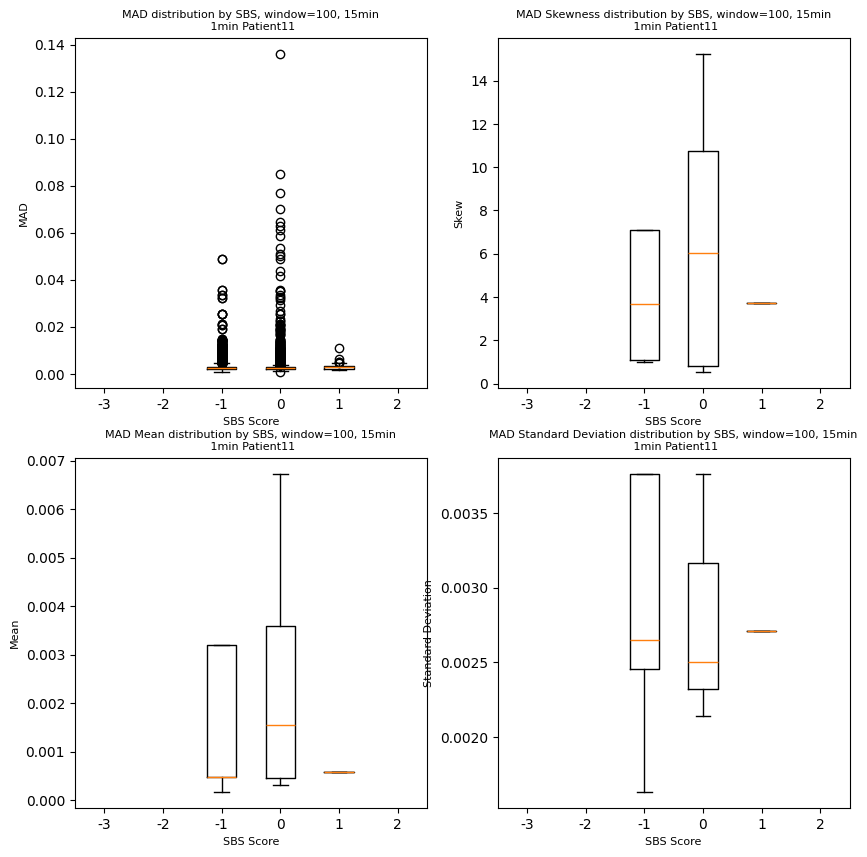

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: 1.4791008953430782
P-value: 0.16952073454375463
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.2832694367187868
P-value: 0.7839576462835791

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

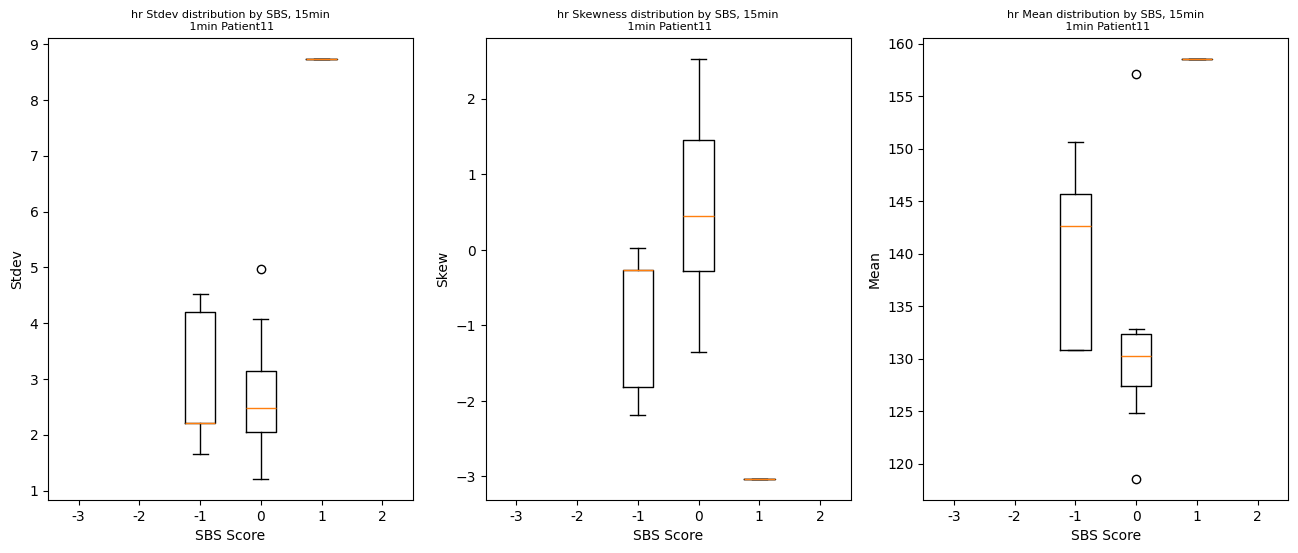

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

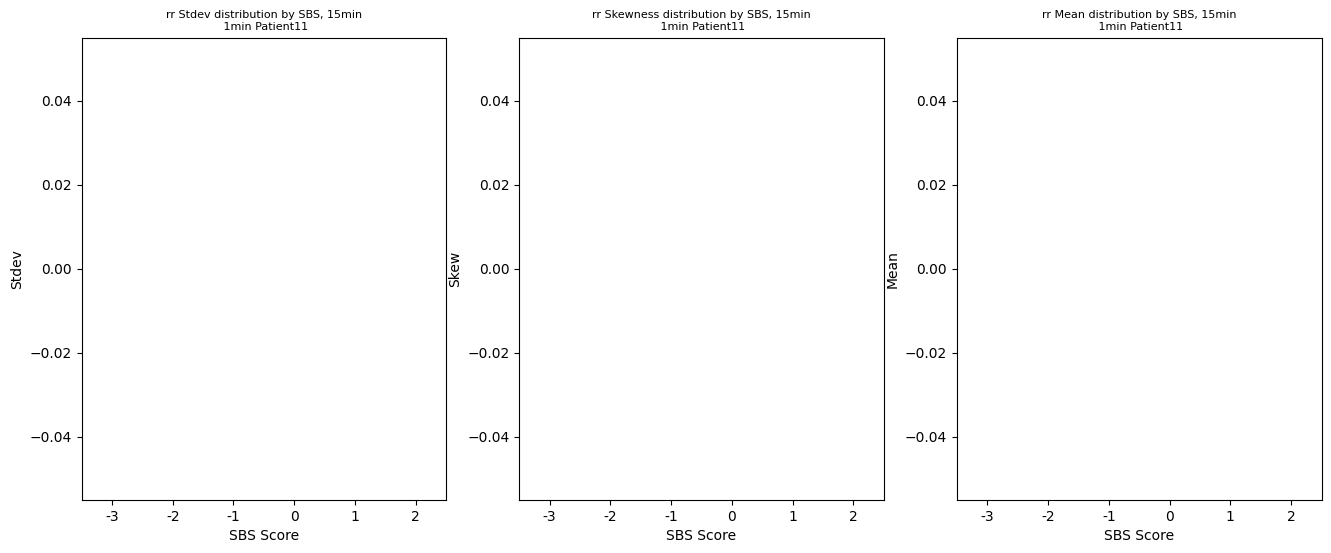

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.06907058784753321
P-value: 0.9461838503396823
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.08102623651968101
P-value: 0.9373110155409601

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

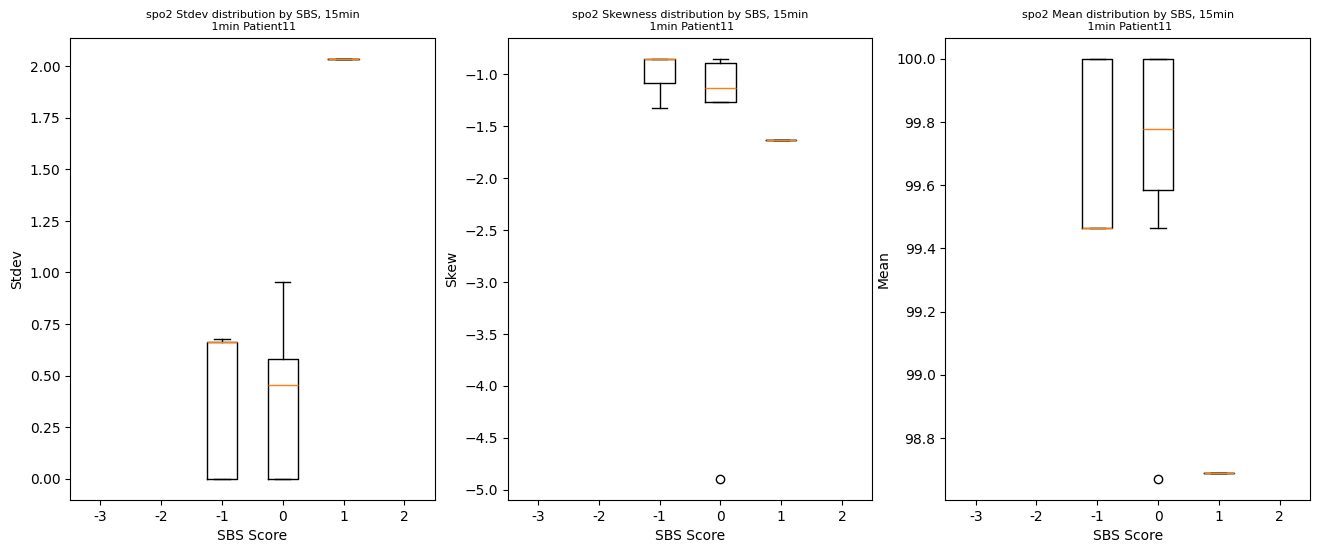

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

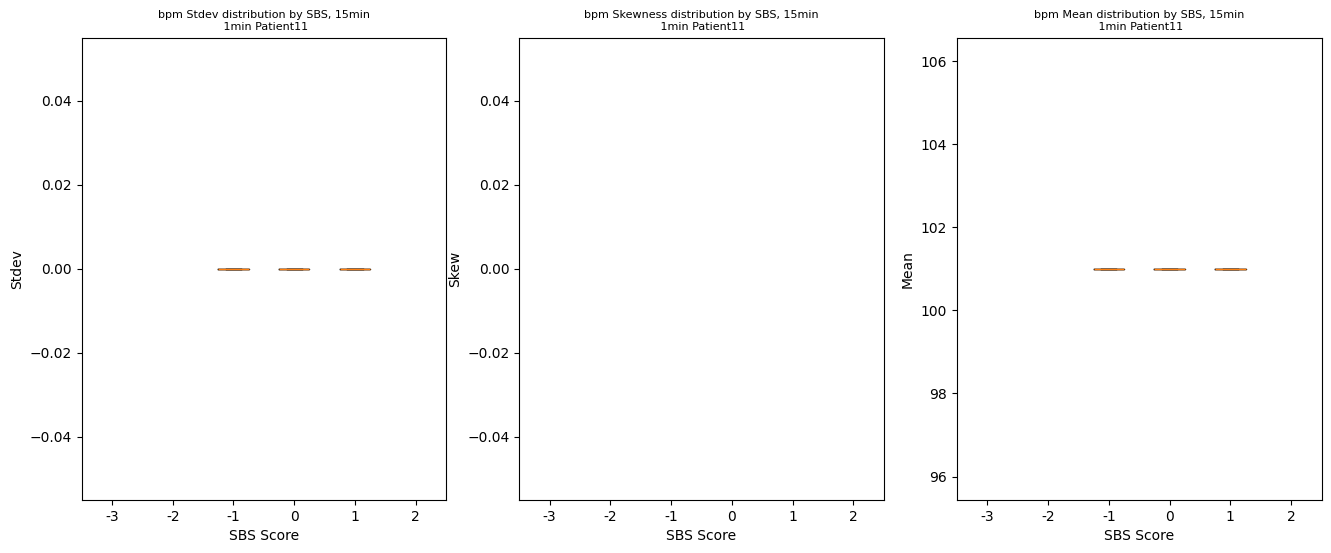

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

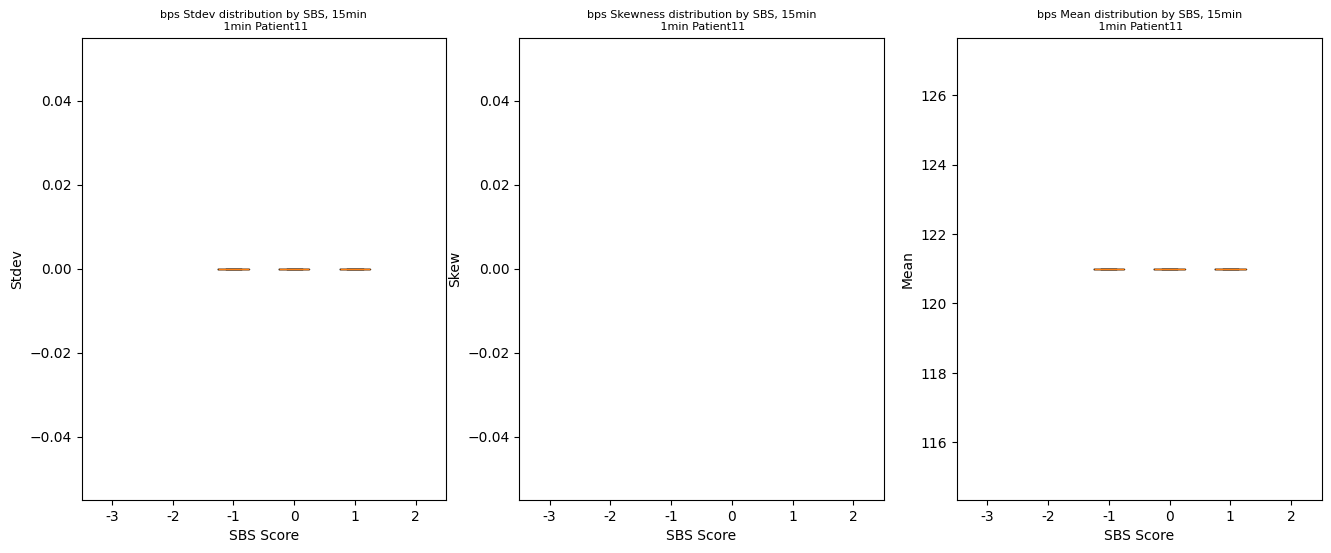

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

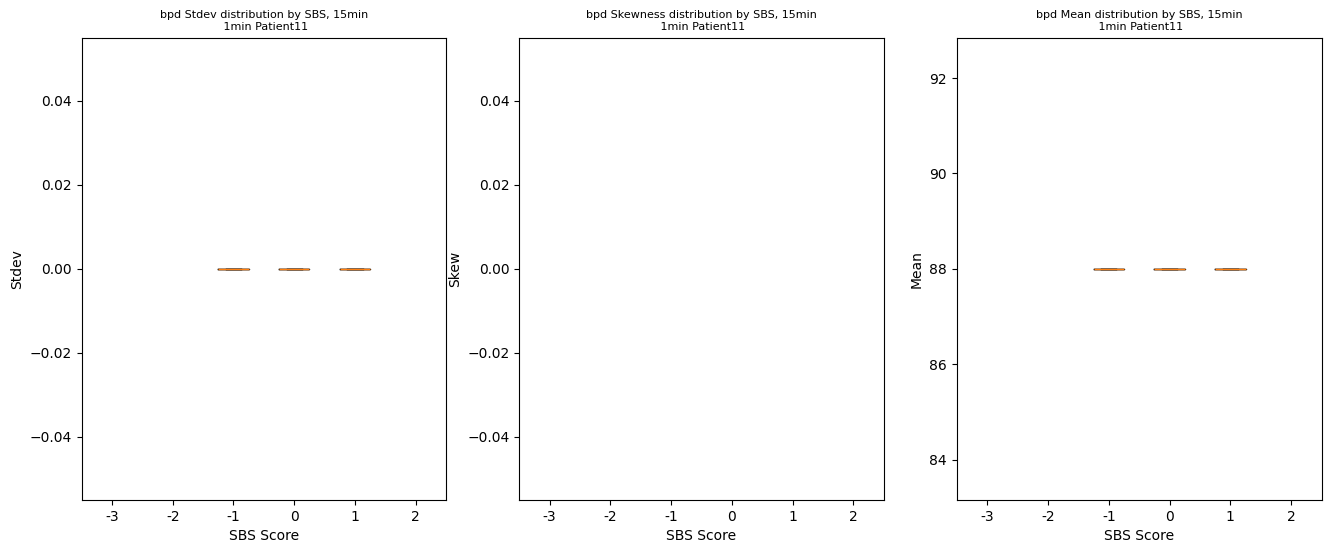

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -22.327482278218643
P-value: 6.860558082324474e-99

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -16.21586187888049
P-value: 1.5607942232095136e-56

T-test for MAD values between SBS Score 0 and 1:
T-statistic: 15.470815174556533
P-value: 1.6239538014848996e-51



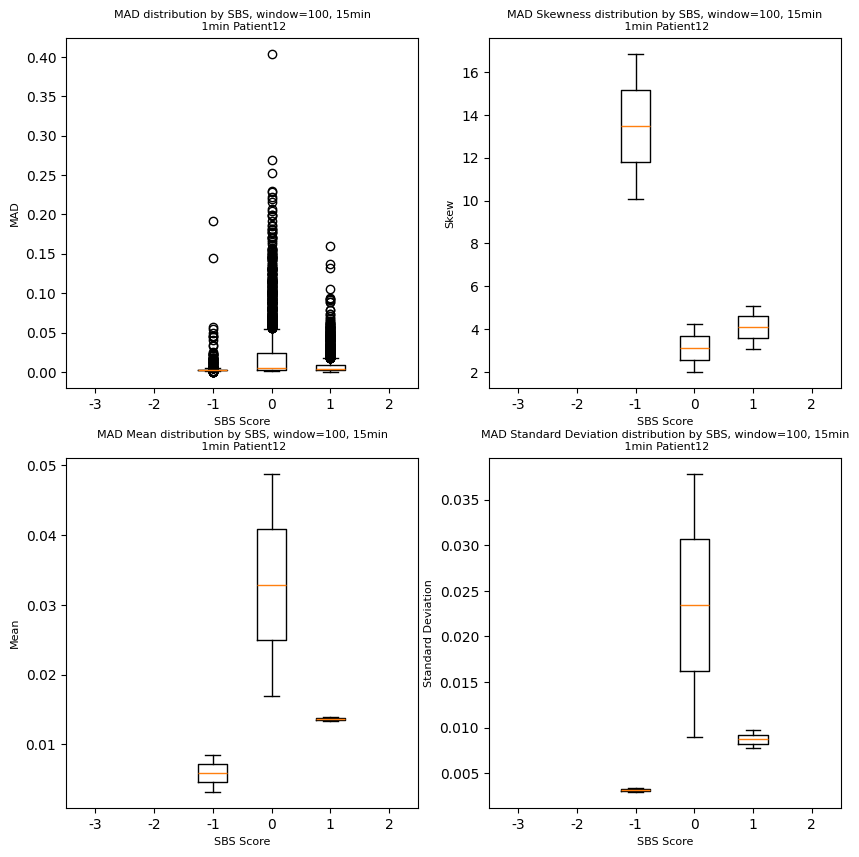

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -5.135564348315482
P-value: 0.07983397193274264
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.4301954813850334
P-value: 0.7129391184508187

T-test for mean values between SBS Score -1 and 1:
T-statistic: -11.226649549137992
P-value: 0.008761381000252142
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.9022700282274282
P-value: 0.4913958869936631

T-test for mean values between SBS Score 0 and 1:
T-statistic: -1.3142925997398123
P-value: 0.3603258723028793
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -0.705418119894181
P-value: 0.5895998414325634



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

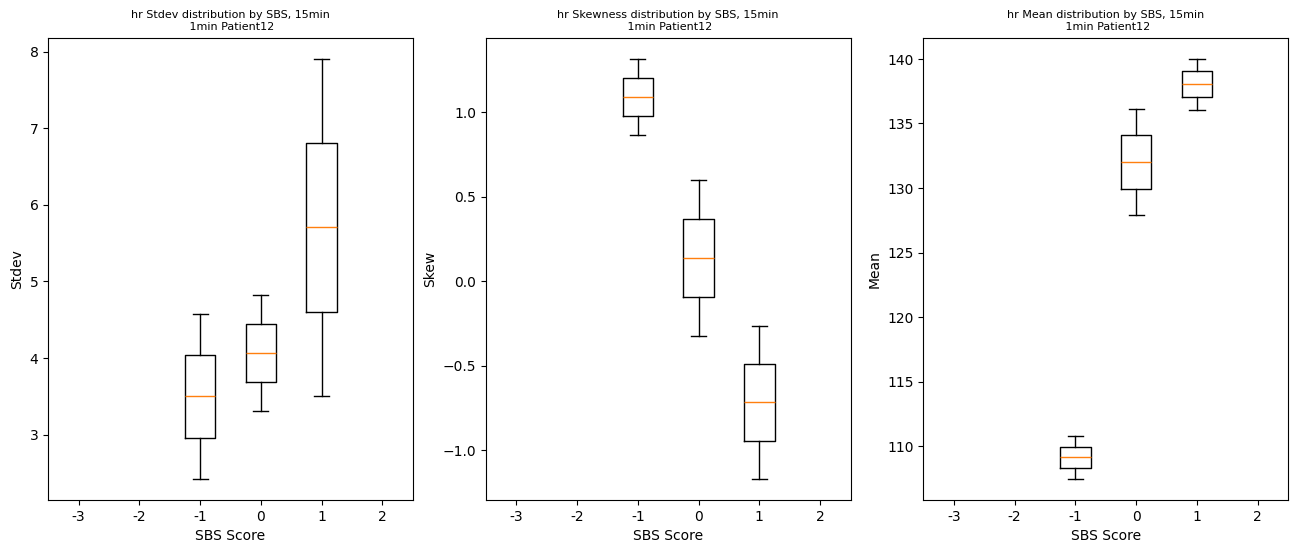

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -2.840655097790788
P-value: 0.16166793999917095
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.6062696651908523
P-value: 0.28414756245547834

T-test for mean values between SBS Score -1 and 1:
T-statistic: -1.5237682524956586
P-value: 0.32506202571383735
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -1.4621520468460845
P-value: 0.2814018735280733

T-test for mean values between SBS Score 0 and 1:
T-statistic: 2.4888357175800553
P-value: 0.13084078535239899
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.6454863687138513
P-value: 0.602905405612792



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

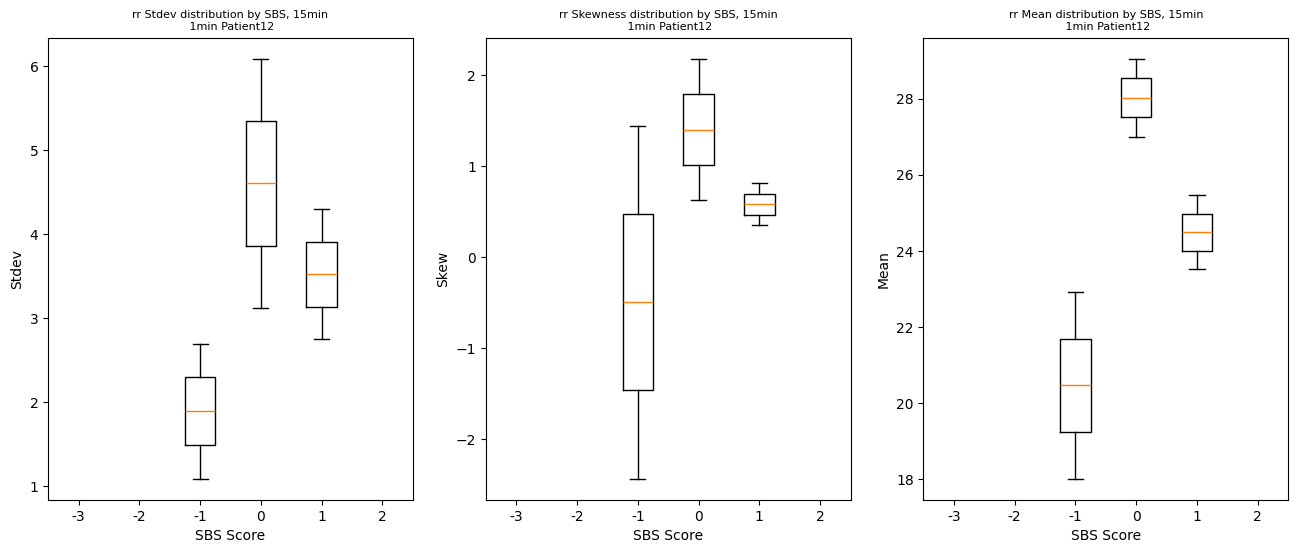

length of signal window for BoxPlot function: 480


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.2861299932415622
P-value: 0.815801627793895
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.44170065925644564
P-value: 0.7148443326290043

T-test for mean values between SBS Score -1 and 1:
T-statistic: -1.9636155638194952
P-value: 0.21209794474526011
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -2.828826914708184
P-value: 0.11581267636444759

T-test for mean values between SBS Score 0 and 1:
T-statistic: -1.3468690219343769
P-value: 0.3445204275098981
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -1.5676446398327617
P-value: 0.2735470063840449



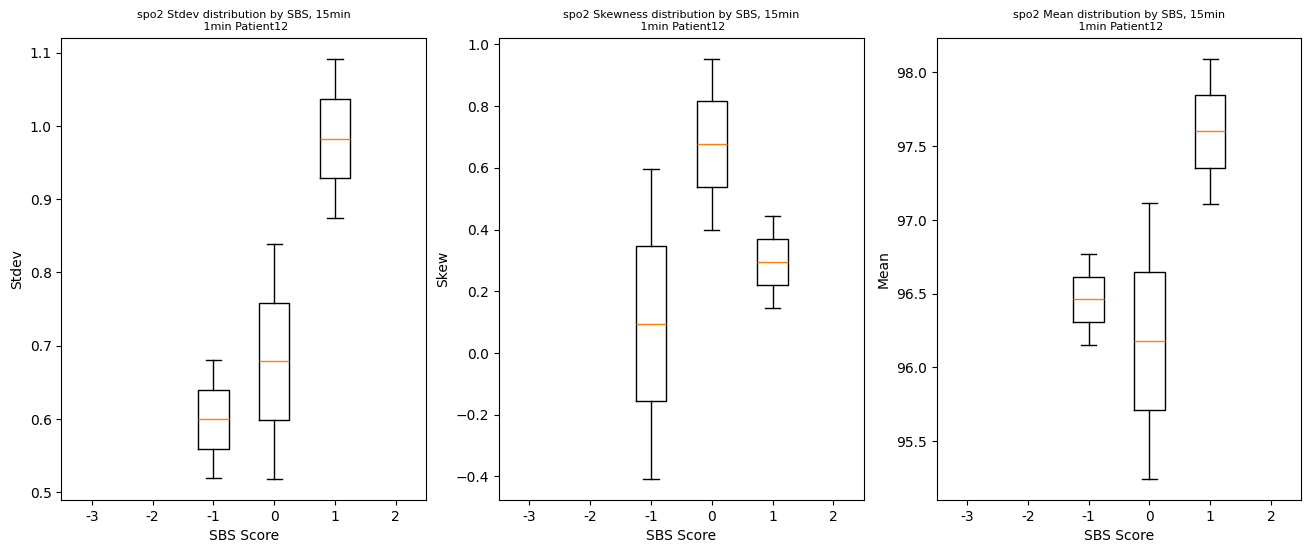

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.19020866549881724
P-value: 0.8707532615040345
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.6119350529493435
P-value: 0.34898298891770096

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.051823059719789455
P-value: 0.9639560880650593
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 1.7351361125166744
P-value: 0.3328429470414967

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.12755566240172317
P-value: 0.9105013149449883
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 1.0
P-value: 0.49999999999999956



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

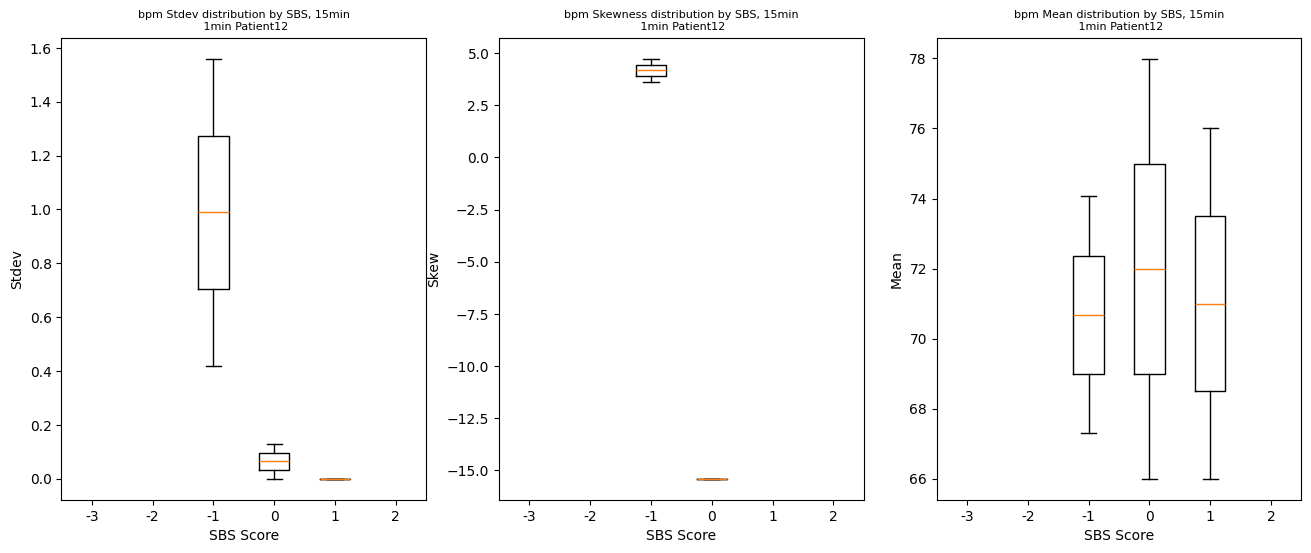

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.47280854579387743
P-value: 0.6878720823869349
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.8651651586154651
P-value: 0.48080948216268815

T-test for mean values between SBS Score -1 and 1:
T-statistic: 0.5184595132986675
P-value: 0.6932834498348857
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 2.5604249778256647
P-value: 0.23704040224727294

T-test for mean values between SBS Score 0 and 1:
T-statistic: -0.07476874568265049
P-value: 0.9518903248106785
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 1.0
P-value: 0.49999999999999956



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

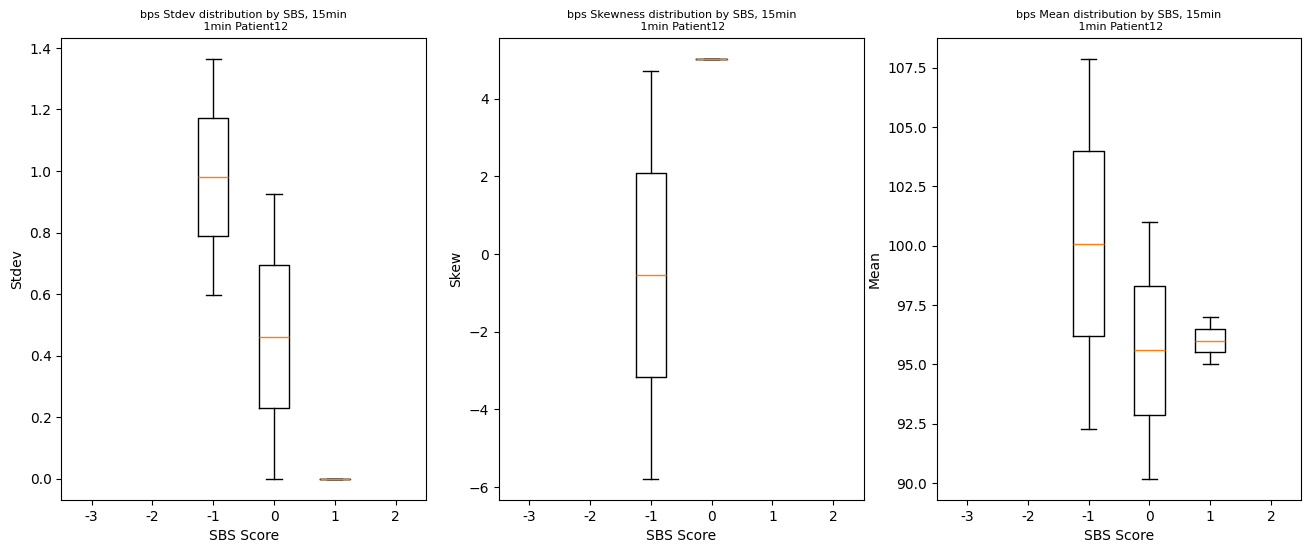

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.9190295168784216
P-value: 0.5089665532136405
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.2887986341104094
P-value: 0.41882077628488534

T-test for mean values between SBS Score -1 and 1:
T-statistic: -0.6401264006845987
P-value: 0.6265596221902063
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 1.6461136263853375
P-value: 0.34753693384384066

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.16428265632168862
P-value: 0.8846865357432963
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 5.601051928382902
P-value: 0.11247566085761627



C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

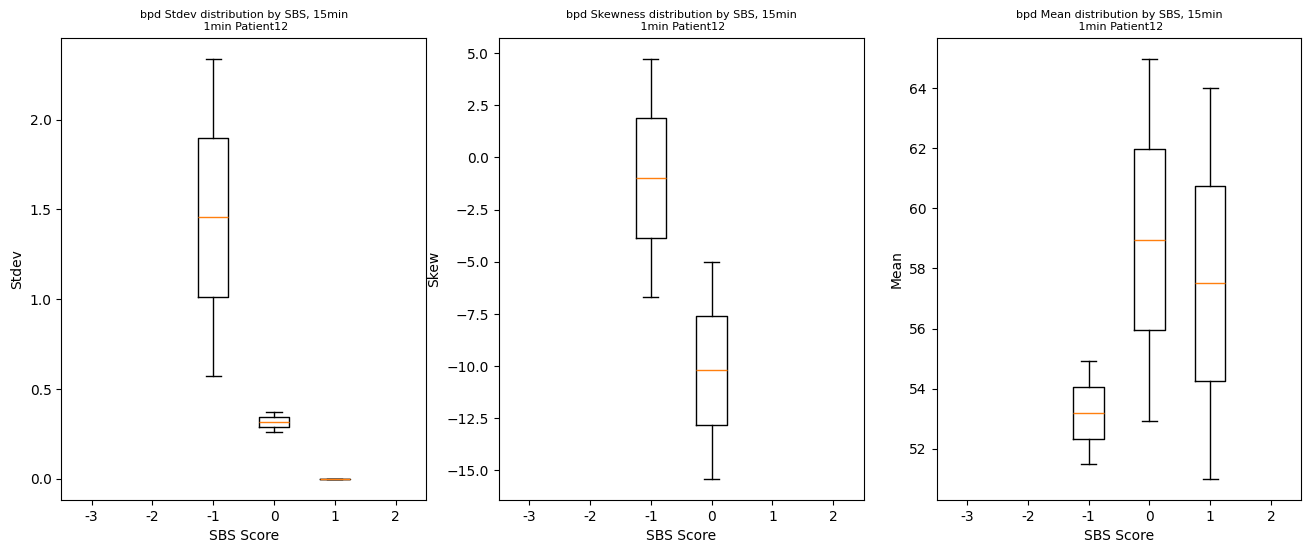

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stde

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 1.2302228632394798
P-value: 0.21863207574124863

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -9.181183885312942
P-value: 4.835871627540102e-20

T-test for MAD values between SBS Score -1 and 2:
T-statistic: -33.32259287056639
P-value: 5.551910177157772e-235

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -11.87652861797176
P-value: 2.3212701042861796e-32

T-test for MAD values between SBS Score 0 and 2:
T-statistic: -37.332701952200274
P-value: 1.5070833886115433e-289

T-test for MAD values between SBS Score 1 and 2:
T-statistic: -27.469445681599442
P-value: 2.052530579948372e-161



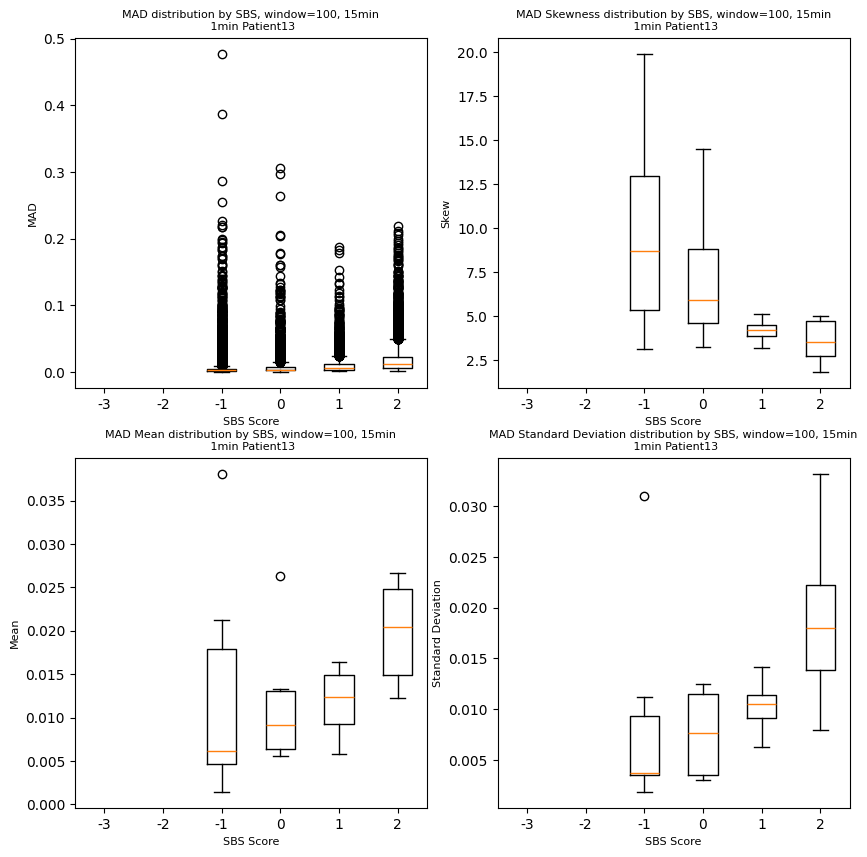

length of signal window for BoxPlot function: 480
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 16, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.07687739936640496
P-value: 0.9398993976852399
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.39794623906014037
P-value: 0.6968678142019913

T-test for mean values between SBS Score -1 and 1:
T-statistic: -2.027399763391315
P-value: 0.06631556062190322
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.5562655590724501
P-value: 0.5876563250400466

T-test for mean values between SBS Score -1 and 2:
T-statistic: -3.5361276282547456
P-value: 0.0052548850004519015
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -2.2982253927308145
P-value: 0.04357676598278241

T-test for mean values between SBS Score 0 and 1:
T-statistic: -2.323361527415352
P-value: 0.04928848061207871
T-test for sta

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

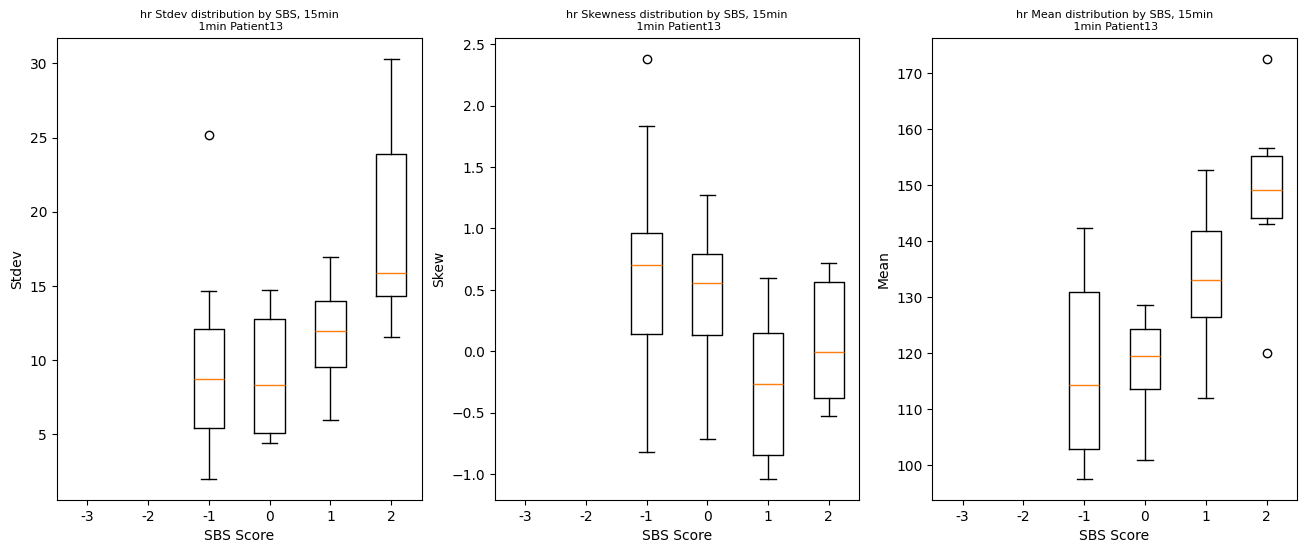

length of signal window for BoxPlot function: 480
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 25, flag_list detected
not enough data at sbs index 27, flag_list detected
not enough data at sbs index 28, flag_list detected
not enough data at sbs index 29, flag_list detected
not enough data at sbs index 30, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.04791283774589615
P-value: 0.9639246149762943
T-test for standard deviation values between SBS Score -1 and 

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sb

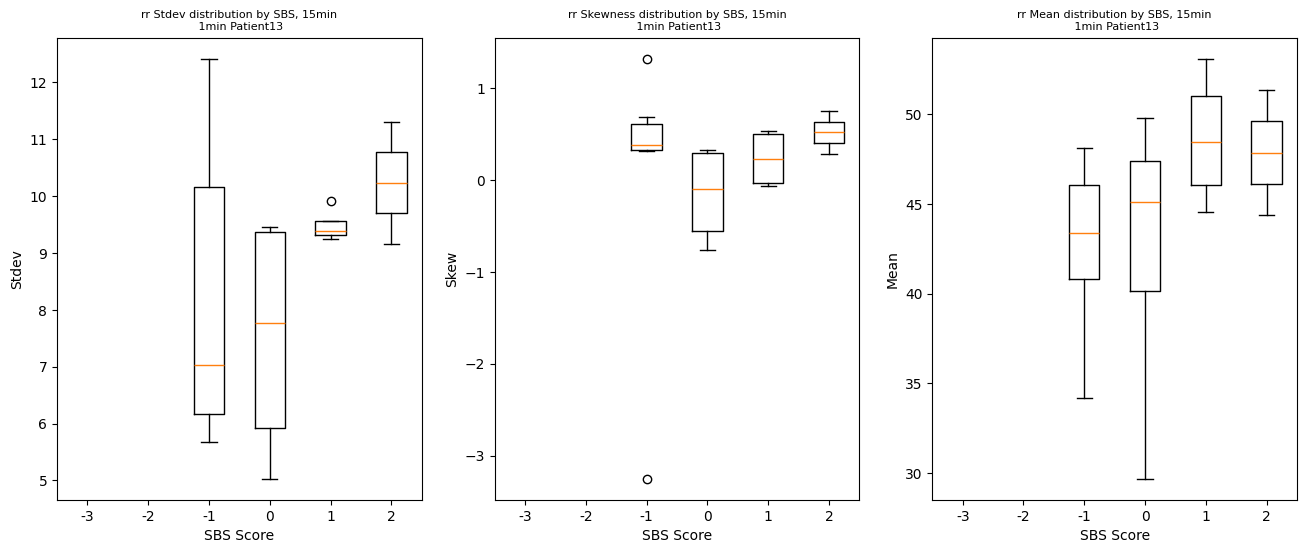

length of signal window for BoxPlot function: 480
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 29, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.2321233470709396
P-value: 0.23821641781977693
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.6523989821685693
P-value: 0.5330850501358892

T-test for mean values between SBS Score -1 and 1:
T-statistic: -2.7207703780177446
P-value: 0.01984625288392604
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.5618676718676154
P-value: 0.6008530208950627

T-test for mean values between SBS Score -1 and 2:
T-statistic: -1.085882313867293
P-value: 0.3014590135210364
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: -1.0035492730760738
P-v

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

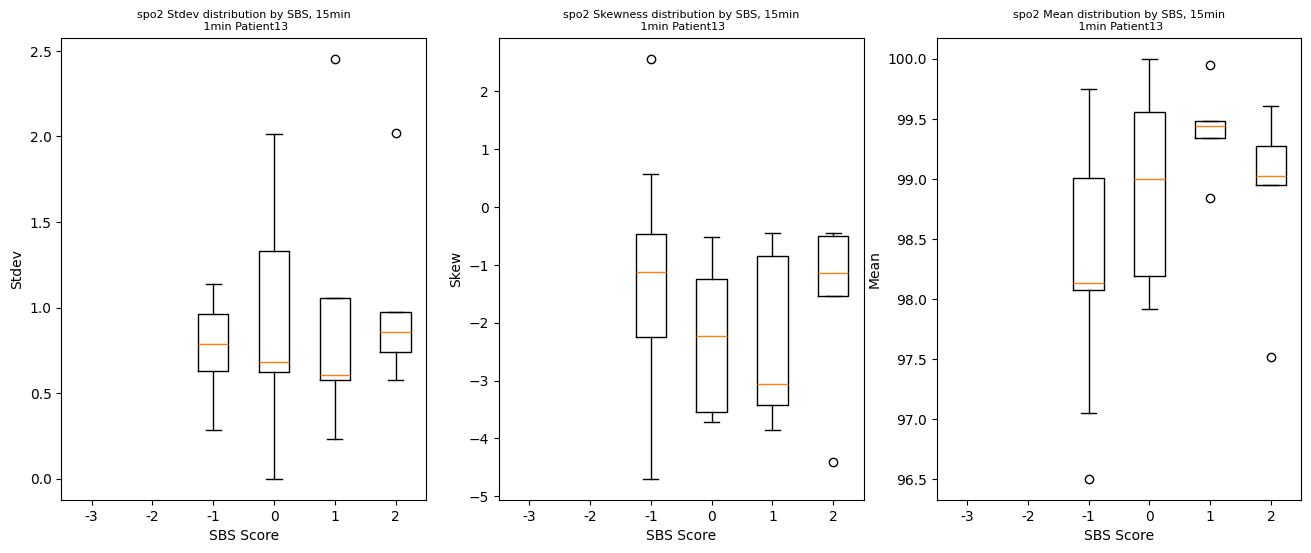

length of signal window for BoxPlot function: 480
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 17, flag_list detected
T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.5353764081945094
P-value: 0.6021706143868589
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.1610628917222252
P-value: 0.2800112330832907

T-test for mean values between SBS Score -1 and 1:
T-statistic: 1.428007387978129
P-value: 0.19237767783676263
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.2286494686005737
P-value: 0.826556943566797

T-test for mean values between SBS Score -1 and 2:
T-statistic: 1.3535712686873658
P-value: 0.20435738402185627
T-test for standard deviation values between SBS Sco

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

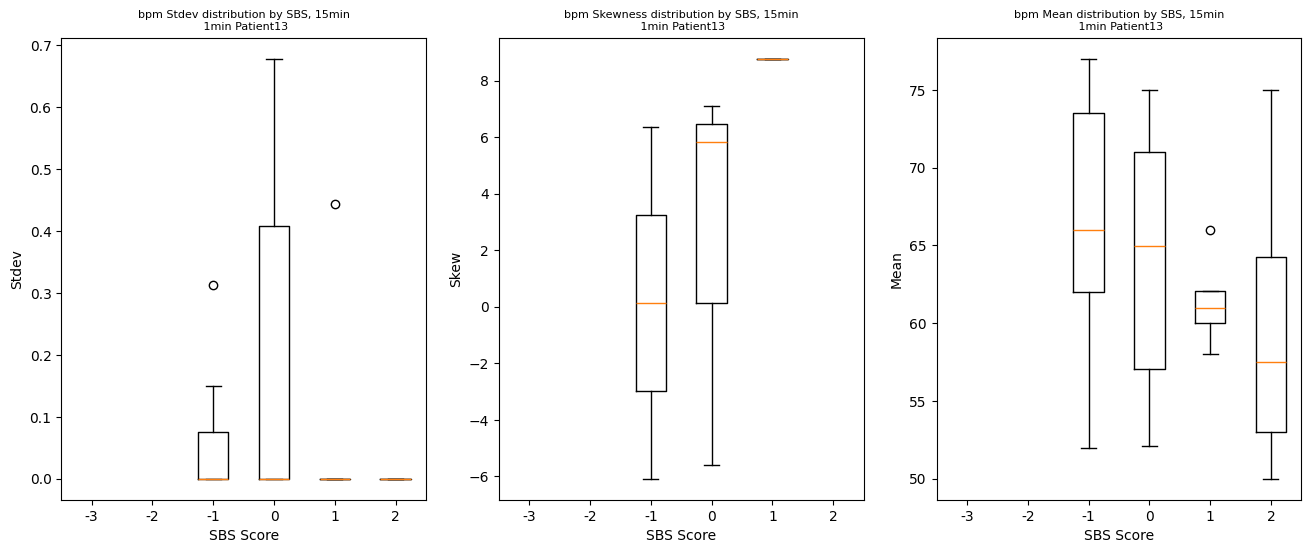

length of signal window for BoxPlot function: 480


C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.6592937809095455
P-value: 0.5207381013957784
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.13922028143856108
P-value: 0.8912641408117146

T-test for mean values between SBS Score -1 and 1:
T-statistic: 1.403272177150012
P-value: 0.1844714621490002
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: 0.2942235368562328
P-value: 0.7748700102903456

T-test for mean values between SBS Score -1 and 2:
T-statistic: 2.282651723933398
P-value: 0.04048352252251505
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 2.339098917739262
P-value: 0.04748243287972315

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.9542053703862722
P-value: 0.359453971326158
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: 0.3886815423344987
P-value: 0.7050469381814428

T-test for mean values between SBS Score 0 and 2:
T-st

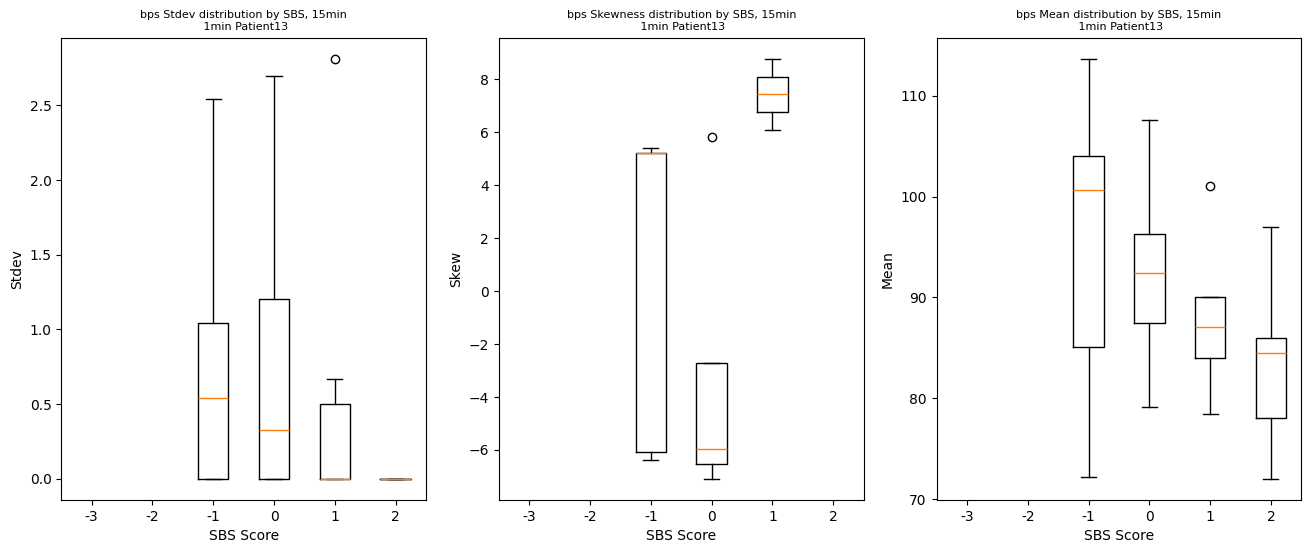

length of signal window for BoxPlot function: 480
T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.5956830330701405
P-value: 0.5603873785424396
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.13060392319283043
P-value: 0.8980931201269582

T-test for mean values between SBS Score -1 and 1:
T-statistic: 0.2632090891636444
P-value: 0.796727519752398
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: -0.19824217375030867
P-value: 0.8485537803561283

T-test for mean values between SBS Score -1 and 2:
T-statistic: 0.7984274571869936
P-value: 0.4374376155450457
T-test for standard deviation values between SBS Score -1 and 2:
T-statistic: 1.867567278809228
P-value: 0.09877560095167295

T-test for mean values between SBS Score 0 and 1:
T-statistic: 0.8546456353605818
P-value: 0.40968464249441905
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: -0.10070800390567154
P-value: 0.922093487235570

C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sraghav9\AppData\Local\Temp\ipykernel_6016\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stde

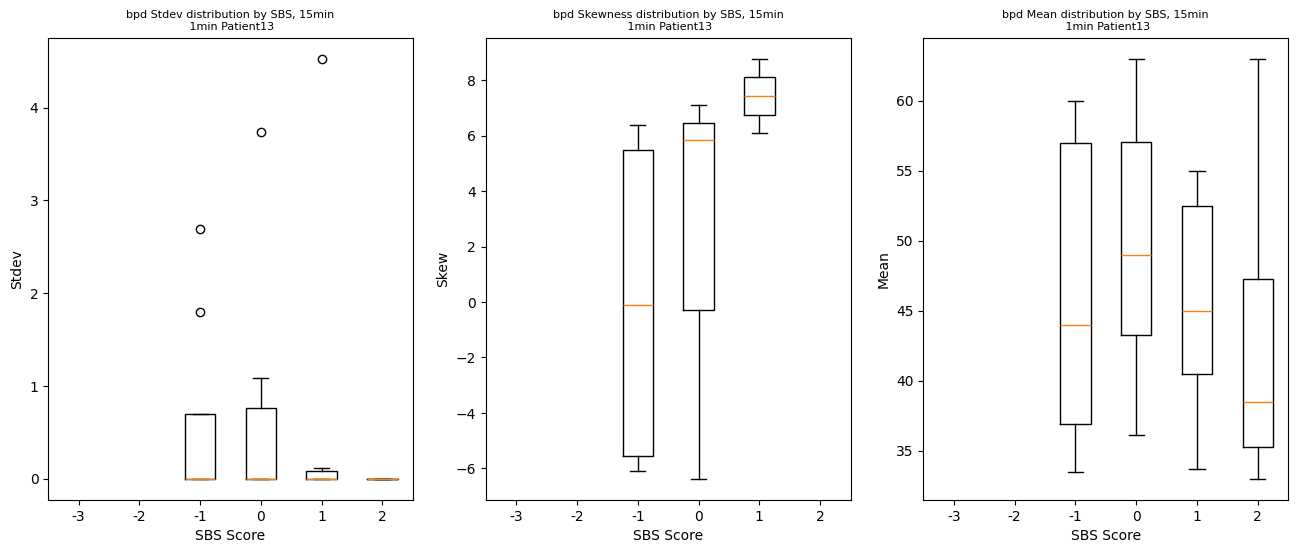

In [9]:

# There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        # data_filepath_accel = os.path.join(patient_dir, f'{patient}_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated.mat')           
        data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MINNurse.mat')
        
        data = loadmat(data_filepath)
        x_mag = data["x_mag"]
        SBS = data["sbs"].flatten()
        
        hr = data['heart_rate']
        SpO2 = data['SpO2']
        rr = data['respiratory_rate']
        bps = data['blood_pressure_systolic']
        bpm = data['blood_pressure_mean']
        bpd = data['blood_pressure_diastolic']
        vitals_list = [hr,rr,SpO2,bpm,bps,bpd]
        vitals_names = ['hr','rr','spo2','bpm','bps','bpd']
        
        #Call Functions for Analysis for each patient here!

        # ACTIGRAPH BOX PLOTS
        ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot(SBS, x_mag, window_size, show_outlier=True)
        ax1[0,0].set_title(f'MAD distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[0,1].set_title(f'MAD Skewness distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,0].set_title(f'MAD Mean distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,1].set_title(f'MAD Standard Deviation distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        plt.show()

        #VITALS BOX PLOTS
        index = 0
        for k in  range(len(vitals_list)): 
            signal = (np.array(vitals_list[k])) 
            print(f'length of signal window for BoxPlot function: {len(signal[0])}') #should be the number of samples in a window
            ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(SBS, signal, window_size, show_outlier=True) #boxplot function iterates through 2D array
            ax2[0].set_title(f'{vitals_names[index]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[1].set_title(f'{vitals_names[index]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[2].set_title(f'{vitals_names[index]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            index+=1
            plt.show()

MAD Box Plots for Default SBS Scores

In [11]:
def MAD_boxplot_default(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[4], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[4], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[4], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    #label axes
    ax[0,0].set_xlabel('SBS Score', fontsize = 8)
    ax[0,0].set_ylabel('MAD', fontsize = 8)
    ax[0,1].set_xlabel('SBS Score', fontsize = 8)
    ax[0,1].set_ylabel('Skew', fontsize = 8)
    ax[1,0].set_xlabel('SBS Score', fontsize = 8)
    ax[1,0].set_ylabel('Mean', fontsize = 8)
    ax[1,1].set_xlabel('SBS Score', fontsize = 8)
    ax[1,1].set_ylabel('Standard Deviation', fontsize = 8)
    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def vitals_boxplot(sbs, vitals_signal, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_skew_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 4: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = vitals_signal[i]
        if np.mean(signal) !=0:
            sbs_skew_dict[sbs_value].append(skew(signal))
            sbs_stdev_dict[sbs_value].append(np.std(signal))
            sbs_mean_dict[sbs_value].append(np.mean(signal))
        else:
            print(f'not enough data at sbs index {i}, flag_list detected') #flag list was detected here. Note: If you go into matlab to cross-check, be aware matlab indices start at 1
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
    
    #Drop NaN Values
    sbs_skew_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_skew_dict.items()}
    sbs_stdev_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_stdev_dict.items()}
    sbs_mean_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_mean_dict.items()}
    
    # Box plot: this version will show the outliers too
    ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[4], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[4], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)
    ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[4], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0_def', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0].set_xlabel('SBS Score', fontsize = 10)
    ax[0].set_ylabel('Stdev', fontsize = 10)
    ax[2].set_xlabel('SBS Score', fontsize = 10)
    ax[2].set_ylabel('Mean', fontsize = 10)
    ax[1].set_xlabel('SBS Score', fontsize = 10)
    ax[1].set_ylabel('Skew', fontsize = 10)
    return ax, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

Load Patient Data

In [12]:
data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 15
slice_size_min = 15
sr = .5

original hr vitals array shape: (118, 450) 
hr SBS index 0 has insufficient data, zeros appended in place
hr SBS index 21 has insufficient data, zeros appended in place
hr SBS index 44 has insufficient data, zeros appended in place
hr SBS index 65 has insufficient data, zeros appended in place
hr SBS index 105 has insufficient data, zeros appended in place
hr SBS index 106 has insufficient data, zeros appended in place
hr SBS index 107 has insufficient data, zeros appended in place
hr SBS index 108 has insufficient data, zeros appended in place
hr SBS index 109 has insufficient data, zeros appended in place
hr SBS index 110 has insufficient data, zeros appended in place
hr SBS index 111 has insufficient data, zeros appended in place
hr SBS index 112 has insufficient data, zeros appended in place
hr SBS index 113 has insufficient data, zeros appended in place
hr SBS index 114 has insufficient data, zeros appended in place
hr SBS index 115 has insufficient data, zeros appended in place
h

ValueError: Dimensions of labels and X must be compatible

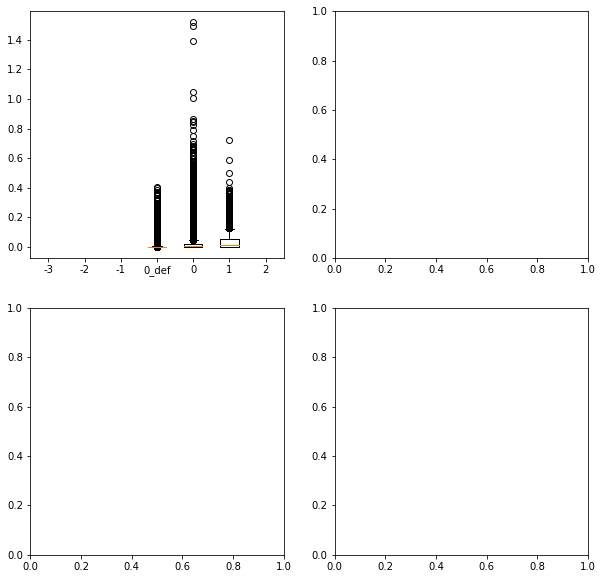

In [16]:
#There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        # data_filepath_accel = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated_Default.mat')           
        data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN.mat')
        
        data = loadmat(data_filepath)
        x_mag = data["x_mag"]
        SBS = data["sbs"].flatten()
        
        hr = data['heart_rate']
        SpO2 = data['SpO2']
        rr = data['respiratory_rate']
        bps = data['blood_pressure_systolic']
        bpm = data['blood_pressure_mean']
        bpd = data['blood_pressure_diastolic']
        vitals_SBS = data['sbs'].flatten()
        # hr = []
        # rr = []
        # SpO2 = []
        # bpm = []
        # bps = []
        # bpd = []
        vitals_list = [hr,rr,SpO2,bpm,bps,bpd]
        vitals_names = ['hr','rr','spo2','bpm','bps','bpd']
        # temp_vitals = [temp_hr,temp_rr, temp_SpO2,temp_bpm,temp_bps,temp_bpd] 
        
        # flag_list = [0] * (int)(sr * 60 * slice_size_min) #generate a list to insert in place of invalid data, 
        # #this list serves as a flag for a window to ignore in the box plot function

        # for j in range(len(vitals_list)): #go through every vitals metric
        #     print(f'original {vitals_names[j]} vitals array shape: {np.array(temp_vitals[j]).shape} ')
        #     for i in range(len(vitals_SBS)): #go through every SBS score for each vitals metric
        #         if (Filtering.checkVitals(temp_vitals[j][i], slice_size_min, vitals_names[j])): #check the data in a single window
        #             vitals_list[j].append(temp_vitals[j][i]) #append that single window data to the 2D hr,rr,spo2,bpm,bps,bpd arrays if that window's data is valid
        #         else:
        #             vitals_list[j].append(flag_list) #append an array of zeros for window number i for the jth vitals metric if the data is invalid(i.e. too many NaN points)
        #             print(f'{vitals_names[j]} SBS index {i} has insufficient data, zeros appended in place') 
        #     print(f'final {vitals_names[j]} vitals array shape: {np.array(vitals_list[j]).shape}') #should be the number of SBS scores by the number of samples in a window

        #Call Functions for Analysis for each patient here!

        # ACTIGRAPH BOX PLOTS
        ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot_default(SBS, x_mag, window_size, show_outlier=True)
        ax1[0,0].set_title(f'MAD distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[0,1].set_title(f'MAD Skewness distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,0].set_title(f'MAD Mean distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,1].set_title(f'MAD Standard Deviation distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        plt.show()

        #VITALS BOX PLOTS
        index = 0
        for k in  range(len(vitals_list)): 
            signal = (np.array(vitals_list[k])) 
            print(f'length of signal window for BoxPlot function: {len(signal[0])}') #should be the number of samples in a window
            ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(SBS, signal, window_size, show_outlier=True) #boxplot function iterates through 2D array
            ax2[0].set_title(f'{vitals_names[index]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[1].set_title(f'{vitals_names[index]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[2].set_title(f'{vitals_names[index]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            index+=1
            plt.show()